In [1]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# representation of model layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

2025-05-01 15:49:33.775667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746114573.971555      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746114574.023800      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **ĐỌC DỮ LIỆU 8 NHÃN**

📌 Nhãn Mirai: Thêm 13,351 dòng, tổng cộng 13,351 dòng
📌 Nhãn DDoS: Thêm 174,841 dòng, tổng cộng 174,841 dòng
📌 Nhãn Spoofing: Thêm 2,572 dòng, tổng cộng 2,572 dòng
📌 Nhãn BENIGN: Thêm 5,645 dòng, tổng cộng 5,645 dòng
📌 Nhãn DoS: Thêm 41,221 dòng, tổng cộng 41,221 dòng
📌 Nhãn Recon: Thêm 1,876 dòng, tổng cộng 1,876 dòng
📌 Nhãn BruteForce: Thêm 55 dòng, tổng cộng 55 dòng
📌 Nhãn Web-based: Thêm 105 dòng, tổng cộng 105 dòng
📌 File 0: Giữ 239,666 dòng sau khi lọc giới hạn
📌 Nhãn Recon: Thêm 1,888 dòng, tổng cộng 3,764 dòng
📌 Nhãn DoS: Thêm 41,933 dòng, tổng cộng 83,154 dòng
📌 Nhãn DDoS: Thêm 176,390 dòng, tổng cộng 351,231 dòng
📌 Nhãn Mirai: Thêm 13,615 dòng, tổng cộng 26,966 dòng
📌 Nhãn Spoofing: Thêm 2,544 dòng, tổng cộng 5,116 dòng
📌 Nhãn BENIGN: Thêm 5,778 dòng, tổng cộng 11,423 dòng
📌 Nhãn Web-based: Thêm 147 dòng, tổng cộng 252 dòng
📌 Nhãn BruteForce: Thêm 70 dòng, tổng cộng 125 dòng
📌 File 1: Giữ 242,365 dòng sau khi lọc giới hạn
📌 Nhãn DoS: Thêm 40,184 dòng, tổng cộng 123,338 dòng
📌

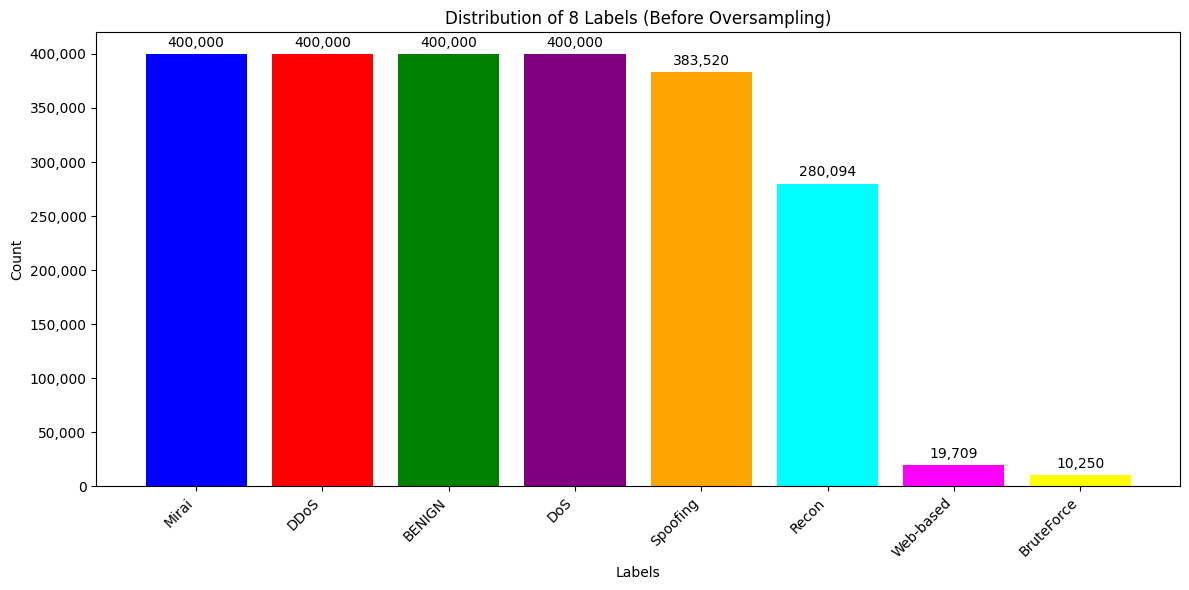

📌 Nhãn Mirai: Đã có 400,000 dòng, giữ nguyên
📌 Nhãn DDoS: Đã có 400,000 dòng, giữ nguyên
📌 Oversampling nhãn Spoofing: Từ 383,520 lên 400,000 dòng
📌 Nhãn BENIGN: Đã có 400,000 dòng, giữ nguyên
📌 Nhãn DoS: Đã có 400,000 dòng, giữ nguyên
📌 Oversampling nhãn Recon: Từ 280,094 lên 400,000 dòng
📌 Oversampling nhãn BruteForce: Từ 10,250 lên 400,000 dòng
📌 Oversampling nhãn Web-based: Từ 19,709 lên 400,000 dòng

📋 Phân bố nhãn sau khi cân bằng bằng oversampling:
label
DDoS          400000
BruteForce    400000
Mirai         400000
Web-based     400000
DoS           400000
Recon         400000
Spoofing      400000
BENIGN        400000
Name: count, dtype: int64


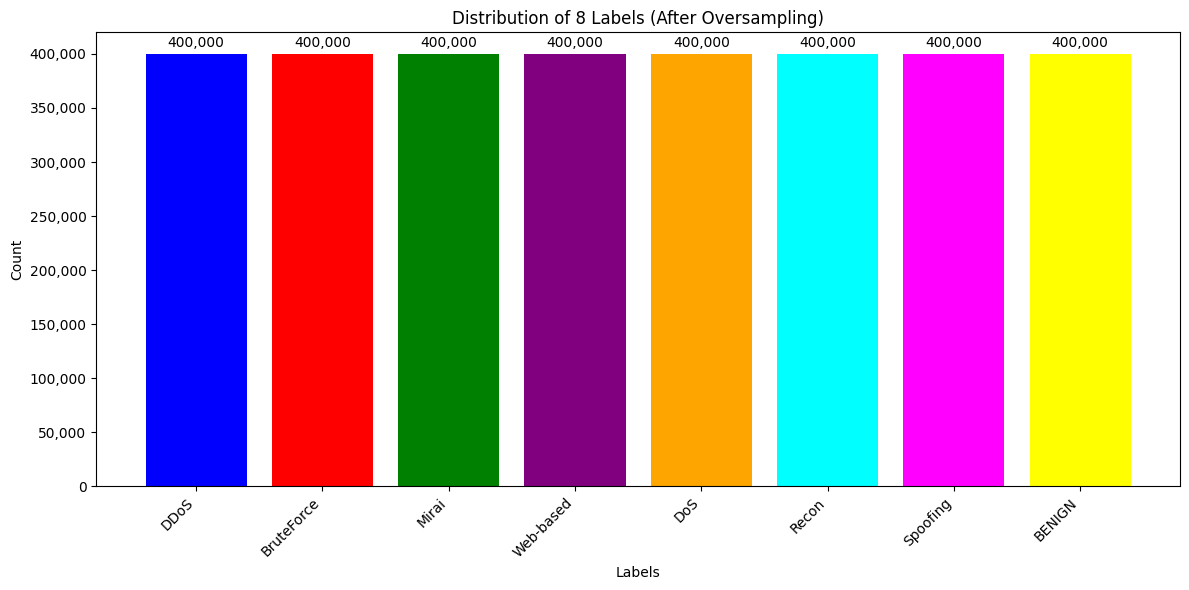

In [4]:


import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cudf  # Dùng cuDF để xử lý dữ liệu nhanh hơn trên GPU
import numpy as np
from sklearn.utils import resample

# Định nghĩa thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Hàm ánh xạ nhãn thành 8 nhóm
def change_label(df):
    mapping = {
        'DDoS-ICMP_Flood': 'DDoS', 'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS',
        'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS', 'DDoS-RSTFINFlood': 'DDoS',
        'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
        'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
        'DDoS-HTTP_Flood': 'DDoS', 'DDoS-SlowLoris': 'DDoS',
        'DoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS',
        'Recon-HostDiscovery': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PortScan': 'Recon',
        'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon',
        'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
        'DictionaryBruteForce': 'BruteForce',
        'BrowserHijacking': 'Web-based', 'XSS': 'Web-based', 'Uploading_Attack': 'Web-based',
        'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based',
        'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai',
        'BenignTraffic': 'BENIGN'
    }
    df["label"] = df["label"].map(mapping).fillna(df["label"])
    return df

# Đọc dữ liệu từ thư mục
data_dir = "/kaggle/input/cic-iot-2023/"
file_list = glob.glob(f"{data_dir}*.csv")[:134]  # Lấy tối đa 134 file

# Giới hạn tối đa và tối thiểu 400,000 dòng cho mỗi nhãn
MAX_ROWS_PER_LABEL = 400_000
MIN_ROWS_PER_LABEL = 400_000
label_counts = {
    "DDoS": 0, "DoS": 0, "Recon": 0, "Spoofing": 0,
    "BruteForce": 0, "Web-based": 0, "Mirai": 0, "BENIGN": 0
}  # Theo dõi số dòng của từng nhãn

def read_file(filename, index):
    try:
        # Đọc file CSV bằng cuDF
        df = cudf.read_csv(filename)
        
        # Kiểm tra cột 'label'
        if 'label' not in df.columns:
            print(f"❌ File {filename}: Không tìm thấy cột 'label'!")
            return None
        
        # Ánh xạ nhãn thành 8 nhóm
        df = change_label(df)
        
        # Lọc dữ liệu dựa trên giới hạn 400K cho mỗi nhãn
        valid_rows = []
        unique_labels = df['label'].unique().to_pandas().tolist()
        for label in unique_labels:
            current_count = label_counts.get(label, 0)
            remaining_quota = MAX_ROWS_PER_LABEL - current_count
            
            if remaining_quota <= 0:
                print(f"⚠ Nhãn {label} đã đủ {MAX_ROWS_PER_LABEL:,} dòng, không đọc thêm!")
                continue
            
            # Lấy các dòng thuộc nhãn này
            label_df = df[df['label'] == label]
            rows_to_take = min(len(label_df), remaining_quota)
            
            if rows_to_take > 0:
                valid_rows.append(label_df[:rows_to_take])
                label_counts[label] = current_count + rows_to_take
                print(f"📌 Nhãn {label}: Thêm {rows_to_take:,} dòng, tổng cộng {label_counts[label]:,} dòng")
        
        # Gộp các dòng hợp lệ
        if valid_rows:
            df_filtered = cudf.concat(valid_rows, ignore_index=True)
            print(f"📌 File {index}: Giữ {df_filtered.shape[0]:,} dòng sau khi lọc giới hạn")
            return df_filtered
        else:
            print(f"⚠ File {index}: Không có dữ liệu nào được giữ lại!")
            return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file {filename}: {e}")
        return None

# Đọc tuần tự từng file
dfs = []
for idx, fname in enumerate(file_list):
    df = read_file(fname, idx)
    if df is not None:
        dfs.append(df)

# Nối dữ liệu và xử lý cân bằng
if dfs:
    df_full = cudf.concat(dfs, ignore_index=True)
    print(f"✅ Dữ liệu đã được nối! Kích thước: {df_full.shape}")
    print(f"📋 Nhãn duy nhất: {df_full['label'].unique().to_pandas().tolist()}")
    
    # Chuyển sang pandas để xử lý oversampling
    df_pandas = df_full.to_pandas()
    
    # Kiểm tra phân bố nhãn trước khi cân bằng
    print("\n📋 Phân bố nhãn trước khi cân bằng:")
    label_distribution = df_pandas["label"].value_counts()
    print(label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn trước khi cân bằng
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(label_distribution.index, label_distribution.values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 8 Labels (Before Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_before_oversampling.png')
    plt.show()
    
    # Chuẩn bị dữ liệu cho oversampling
    balanced_dfs = []
    unique_labels = df_pandas['label'].unique()
    
    # Áp dụng oversampling thủ công cho mỗi nhãn
    for label in unique_labels:
        label_df = df_pandas[df_pandas['label'] == label]
        current_count = len(label_df)
        
        if current_count < MIN_ROWS_PER_LABEL:
            # Oversampling bằng resample
            oversampled_df = resample(
                label_df,
                replace=True,  # Cho phép sao chép mẫu
                n_samples=MIN_ROWS_PER_LABEL,  # Đạt 400K
                random_state=42
            )
            print(f"📌 Oversampling nhãn {label}: Từ {current_count:,} lên {MIN_ROWS_PER_LABEL:,} dòng")
            balanced_dfs.append(oversampled_df)
        else:
            print(f"📌 Nhãn {label}: Đã có {current_count:,} dòng, giữ nguyên")
            balanced_dfs.append(label_df)
    
    # Gộp dữ liệu đã cân bằng
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    # Chuyển lại thành cuDF để đồng bộ
    df_full = cudf.from_pandas(df_balanced)
    
    # Kiểm tra phân bố nhãn sau khi cân bằng
    print("\n📋 Phân bố nhãn sau khi cân bằng bằng oversampling:")
    balanced_label_distribution = df_full["label"].value_counts().to_pandas()
    print(balanced_label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn sau khi cân bằng
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(balanced_label_distribution.index, balanced_label_distribution.values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 8 Labels (After Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_after_oversampling.png')
    plt.show()
    
    # # Lưu df_full đã cân bằng để kiểm tra
    # df_full.to_pandas().to_csv(f'{output_dir}/balanced_data_8labels.csv', index=False)
    # print(f"✅ Dữ liệu đã cân bằng và lưu tại '{output_dir}/balanced_data_8labels.csv'")
    
else:
    print("⚠ Không có file nào được đọc thành công hoặc tất cả dữ liệu rỗng!")

# **ÁNH XẠ NHÃN**

📋 Nhãn duy nhất trong dữ liệu: ['Mirai', 'DDoS', 'Spoofing', 'BENIGN', 'DoS', 'Recon', 'BruteForce', 'Web-based']
📊 Ánh xạ nhãn (8 nhãn): {'BENIGN': 0, 'BruteForce': 1, 'DDoS': 2, 'DoS': 3, 'Mirai': 4, 'Recon': 5, 'Spoofing': 6, 'Web-based': 7}

📊 Phân bố nhãn trong tập huấn luyện:
0    260000
4    260000
6    260000
7    260000
3    260000
1    260000
5    260000
2    260000
Name: count, dtype: int64

📊 Phân bố nhãn trong tập validation:
7    60000
5    60000
4    60000
1    60000
6    60000
2    60000
3    60000
0    60000
Name: count, dtype: int64

📊 Phân bố nhãn trong tập kiểm tra:
7    80000
1    80000
4    80000
3    80000
6    80000
2    80000
0    80000
5    80000
Name: count, dtype: int64
🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:
     flow_duration  Header_Length  Protocol Type  Duration          Rate  \
min      -0.082931      -0.078134      -0.922078 -1.855932     -0.270129   
max    2057.701837      69.911050       5.181818  5.347458  75807.264431   

            

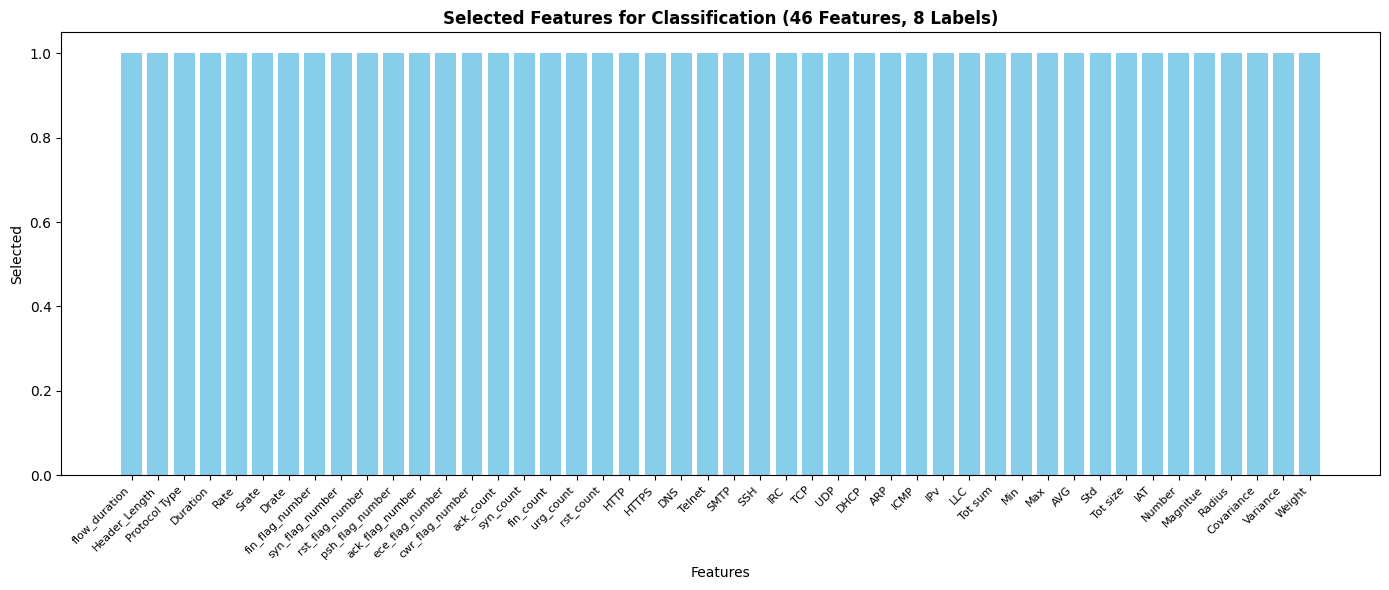

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
import pickle
import os
import matplotlib.pyplot as plt

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Kiểm tra nhãn duy nhất
print("📋 Nhãn duy nhất trong dữ liệu:", y.unique().tolist())

# Danh sách 46 đặc trưng (giả định chọn 46 cột số đầu tiên hoặc từ bài toán 34 nhãn)
# Nếu bạn có danh sách cụ thể, thay vào đây
all_numeric_columns = X.columns.tolist()
if len(all_numeric_columns) < 46:
    raise ValueError(f"❌ Dữ liệu chỉ có {len(all_numeric_columns)} cột số, không đủ 46 đặc trưng!")
selected_features = all_numeric_columns[:46]  # Chọn 46 cột đầu tiên
# Ví dụ: Nếu bạn có danh sách 46 đặc trưng từ bài toán 34 nhãn, thay bằng:
# selected_features = [
#     'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length',
#     'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius',
#     'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP',
#     'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP',
#     'fin_count', 'UDP', 'SSH', 'DNS', 'Drate', 'fin_flag_number', 'psh_flag_number',
#     'LLC', 'ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'ARP', 'DHCP',
#     'Length', 'Correlation', 'Entropy', 'Skewness'
# ]

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng đã chọn
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng đã chọn trước khi chia dữ liệu
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (8 nhãn: DDoS, DoS, Recon, Spoofing, BruteForce, Web-based, Mirai, BENIGN)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("📊 Ánh xạ nhãn (8 nhãn):", label_mapping)

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Kiểm tra giá trị sau khi chọn đặc trưng
print("🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_val_scaled:")
print(pd.DataFrame(X_val_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=selected_features).describe().loc[['min', 'max']])

# Lưu dữ liệu đã xử lý
np.save(f"{output_dir}/X_train_scaled_8labels_46features.npy", X_train_scaled)
np.save(f"{output_dir}/Y_train_encoded_8labels_46features.npy", Y_train_encoded)
np.save(f"{output_dir}/X_val_scaled_8labels_46features.npy", X_val_scaled)
np.save(f"{output_dir}/Y_val_encoded_8labels_46features.npy", Y_val_encoded)
np.save(f"{output_dir}/X_test_scaled_8labels_46features.npy", X_test_scaled)
np.save(f"{output_dir}/Y_test_encoded_8labels_46features.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_8labels_46features.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_8labels_46features.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_8labels_46features.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_8labels_46features.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
print(f"📋 Các đặc trưng được chọn: {selected_features}")

# Vẽ biểu đồ danh sách đặc trưng được chọn
plt.figure(figsize=(14, 6))
plt.bar(selected_features, [1] * len(selected_features), color='skyblue')
plt.title('Selected Features for Classification (46 Features, 8 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_8labels_46features.png")
plt.show()

# **CHUYỂN ĐỔI ĐẶC TRƯNG FUZZY**

In [6]:
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Tải dữ liệu đã xử lý (46 đặc trưng)
X_train_scaled = np.load(f"{output_dir}/X_train_scaled_8labels_46features.npy")
Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
X_val_scaled = np.load(f"{output_dir}/X_val_scaled_8labels_46features.npy")
Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
X_test_scaled = np.load(f"{output_dir}/X_test_scaled_8labels_46features.npy")
Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")

# Kiểm tra shape
print(f"📌 Shape dữ liệu đầu vào:")
print(f"  - X_train_scaled: {X_train_scaled.shape}")
print(f"  - X_val_scaled: {X_val_scaled.shape}")
print(f"  - X_test_scaled: {X_test_scaled.shape}")

# Chia 46 đặc trưng thành 8 nhóm (7 nhóm 6 đặc trưng, 1 nhóm 4 đặc trưng)
n_groups = 8
group_sizes = [6] * 7 + [4]  # [6, 6, 6, 6, 6, 6, 6, 4]
X_train_grouped = []
X_val_grouped = []
X_test_grouped = []

print("🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...")
for i in range(n_groups):
    start_idx = sum(group_sizes[:i])
    end_idx = start_idx + group_sizes[i]
    X_train_group = X_train_scaled[:, start_idx:end_idx]
    X_val_group = X_val_scaled[:, start_idx:end_idx]
    X_test_group = X_test_scaled[:, start_idx:end_idx]

    print(f"  - Nhóm {i+1}: Đặc trưng từ {start_idx} đến {end_idx-1} (kích thước: {group_sizes[i]})")

    # Huấn luyện XGBoost trên nhóm đặc trưng
    xgb = XGBClassifier(
        n_estimators=50,
        max_depth=8,
        min_child_weight=10,
        tree_method="hist",
        device="cuda",
        random_state=42,
        objective="multi:softprob"
    )
    xgb.fit(X_train_group, Y_train_encoded)

    # Tạo xác suất dự đoán
    train_probs = xgb.predict_proba(X_train_group)  # Shape: [n_samples, 8]
    val_probs = xgb.predict_proba(X_val_group)
    test_probs = xgb.predict_proba(X_test_group)

    X_train_grouped.append(train_probs)
    X_val_grouped.append(val_probs)
    X_test_grouped.append(test_probs)

    # Lưu mô hình XGBoost
    joblib.dump(xgb, f"{output_dir}/xgb_group_{i}_8labels_46features.joblib")
    print(f"✅ Đã xử lý nhóm {i+1}/{n_groups}")

# Gộp đặc trưng xác suất
X_train_grouped = np.concatenate(X_train_grouped, axis=1)  # Shape: [n_samples, 8*8 = 64]
X_val_grouped = np.concatenate(X_val_grouped, axis=1)
X_test_grouped = np.concatenate(X_test_grouped, axis=1)

# (Tùy chọn) Kết hợp với top-k đặc trưng gốc
k = 10  # Chọn 10 đặc trưng quan trọng nhất
xgb_full = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    tree_method="hist",
    device="cuda",
    random_state=42
)
xgb_full.fit(X_train_scaled, Y_train_encoded)
feature_importance = xgb_full.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:k]

# Kết hợp đặc trưng xác suất và đặc trưng gốc
X_train_combined = np.concatenate([X_train_grouped, X_train_scaled[:, sorted_idx]], axis=1)  # Shape: [n_samples, 64+10 = 74]
X_val_combined = np.concatenate([X_val_grouped, X_val_scaled[:, sorted_idx]], axis=1)
X_test_combined = np.concatenate([X_test_grouped, X_test_scaled[:, sorted_idx]], axis=1)

# Chuẩn hóa lại dữ liệu
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_val_combined = scaler.transform(X_val_combined)
X_test_combined = scaler.transform(X_test_combined)

# Lưu dữ liệu
np.save(f"{output_dir}/X_train_combined_8labels_46features.npy", X_train_combined)
np.save(f"{output_dir}/X_val_combined_8labels_46features.npy", X_val_combined)
np.save(f"{output_dir}/X_test_combined_8labels_46features.npy", X_test_combined)
np.save(f"{output_dir}/Y_train_encoded_8labels_46features.npy", Y_train_encoded)
np.save(f"{output_dir}/Y_val_encoded_8labels_46features.npy", Y_val_encoded)
np.save(f"{output_dir}/Y_test_encoded_8labels_46features.npy", Y_test_encoded)
joblib.dump(scaler, f"{output_dir}/scaler_combined_8labels_46features.joblib")

# In thông tin
print(f"✅ Đã tạo đặc trưng kết hợp!")
print(f"📌 Shape: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")
print(f"📌 Số đặc trưng: {X_train_combined.shape[1]} (64 xác suất + 10 gốc)")

📌 Shape dữ liệu đầu vào:
  - X_train_scaled: (2080000, 46)
  - X_val_scaled: (480000, 46)
  - X_test_scaled: (640000, 46)
🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...
  - Nhóm 1: Đặc trưng từ 0 đến 5 (kích thước: 6)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:53:29] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


✅ Đã xử lý nhóm 1/8
  - Nhóm 2: Đặc trưng từ 6 đến 11 (kích thước: 6)
✅ Đã xử lý nhóm 2/8
  - Nhóm 3: Đặc trưng từ 12 đến 17 (kích thước: 6)
✅ Đã xử lý nhóm 3/8
  - Nhóm 4: Đặc trưng từ 18 đến 23 (kích thước: 6)
✅ Đã xử lý nhóm 4/8
  - Nhóm 5: Đặc trưng từ 24 đến 29 (kích thước: 6)
✅ Đã xử lý nhóm 5/8
  - Nhóm 6: Đặc trưng từ 30 đến 35 (kích thước: 6)
✅ Đã xử lý nhóm 6/8
  - Nhóm 7: Đặc trưng từ 36 đến 41 (kích thước: 6)
✅ Đã xử lý nhóm 7/8
  - Nhóm 8: Đặc trưng từ 42 đến 45 (kích thước: 4)
✅ Đã xử lý nhóm 8/8
✅ Đã tạo đặc trưng kết hợp!
📌 Shape: train (2080000, 74), val (480000, 74), test (640000, 74)
📌 Số đặc trưng: 74 (64 xác suất + 10 gốc)


# **MÔ HÌNH TABNET**

⏱️ Thời gian huấn luyện trung bình mỗi epoch: 88.53 giây

📊 Giá trị trung bình ở Stage 2 (epoch 5 đến 105):
Train Loss trung bình: 0.1004
Val Loss trung bình: 0.1024
Train Accuracy trung bình: 96.27%
Val Accuracy trung bình: 96.24%

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Contrastive Loss
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_positive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2))
        loss_negative = torch.mean(label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return (loss_positive + loss_negative) / 2

# Entmax
def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

# Ghost Batch Normalization
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# TabNet thuần túy
class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=1e-8):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        # BatchNorm đầu vào
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # Lớp FC ban đầu
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight)
        nn.init.zeros_(self.initial_fc.bias)

        # Các lớp chú ý (attention) và quyết định (decision) cho từng bước
        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.2)
            ) for _ in range(n_steps)
        ])

        # Lớp cuối để tạo embedding (Stage 1) hoặc logits (Stage 2)
        self.fc_embed = nn.Linear(n_d * n_steps, n_d)  # Dùng trong Stage 1
        self.fc_output = nn.Linear(n_d * n_steps, num_classes)  # Dùng trong Stage 2
        nn.init.xavier_normal_(self.fc_embed.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_embed.bias)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, stage='classification'):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            # Tạo đặc trưng chú ý và quyết định
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            # Tính sparsity loss
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            # Cập nhật prior và áp dụng mask
            prior = prior * (self.gamma - mask)
            masked_x = x * mask

            # Tạo đầu ra quyết định
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        # Kết hợp đầu ra từ tất cả các bước
        combined = torch.cat(outputs, dim=1)  # [batch_size, n_d * n_steps]

        # Tạo embedding (Stage 1) hoặc logits (Stage 2)
        if stage == 'feature_learning':
            output = self.fc_embed(combined)
        else:  # stage == 'classification'
            output = self.fc_output(combined)

        return output, sparsity_loss, masks

# Tải dữ liệu (8 nhãn, 30 đặc trưng)
try:
    X_train_scaled = np.load(f"{output_dir}/X_train_scaled_8labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels.npy")
    X_val_scaled = np.load(f"{output_dir}/X_val_scaled_8labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels.npy")
    X_test_scaled = np.load(f"{output_dir}/X_test_scaled_8labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels.npy")
    tqdm.write("✅ Đã tải dữ liệu scaled và nhãn")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Tải soft labels từ XGBoost (8 nhãn)
try:
    soft_labels_train = np.load(f"{results_dir}/soft_labels_train_8labels.npy")
    soft_labels_val = np.load(f"{results_dir}/soft_labels_val_8labels.npy")
    soft_labels_test = np.load(f"{results_dir}/soft_labels_test_8labels.npy")
    tqdm.write(f"✅ Đã tải soft labels từ {results_dir}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải soft labels: {str(e)}")
    raise

# Kiểm tra kích thước soft labels
if soft_labels_train.shape[0] != X_train_scaled.shape[0]:
    raise ValueError(f"Kích thước soft_labels_train ({soft_labels_train.shape[0]}) không khớp với X_train_scaled ({X_train_scaled.shape[0]})")
if soft_labels_val.shape[0] != X_val_scaled.shape[0]:
    raise ValueError(f"Kích thước soft_labels_val ({soft_labels_val.shape[0]}) không khớp với X_val_scaled ({X_val_scaled.shape[0]})")
if soft_labels_test.shape[0] != X_test_scaled.shape[0]:
    raise ValueError(f"Kích thước soft_labels_test ({soft_labels_test.shape[0]}) không khớp với X_test_scaled ({X_test_scaled.shape[0]})")

# Nối soft labels vào đặc trưng đầu vào
X_train_aug = np.concatenate([X_train_scaled, soft_labels_train], axis=1)  # Shape: (n_train, 38)
X_val_aug = np.concatenate([X_val_scaled, soft_labels_val], axis=1)        # Shape: (n_val, 38)
X_test_aug = np.concatenate([X_test_scaled, soft_labels_test], axis=1)      # Shape: (n_test, 38)
tqdm.write(f"✅ Đã nối soft labels vào đặc trưng, shape: train {X_train_aug.shape}, val {X_val_aug.shape}, test {X_test_aug.shape}")

# Chuyển thành tensor
X_train_tensor = torch.tensor(X_train_aug, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
soft_labels_train_tensor = torch.tensor(soft_labels_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_aug, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
soft_labels_val_tensor = torch.tensor(soft_labels_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_aug, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 512
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor, soft_labels_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor, soft_labels_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"📡 Thiết bị: {device}")

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_aug.shape[1]  # 38 đặc trưng (30 + 8 soft labels)
model = TabNet(input_dim=input_dim, num_classes=8, n_d=64, n_a=64, n_steps=5).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_ce = nn.CrossEntropyLoss()  # Dùng cho phân loại đa lớp
criterion_contrast = ContrastiveLoss(margin=1.0)

# Danh sách lưu dữ liệu
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
epoch_times = []

# Two-Stage Training
num_epochs_stage1 = 5
num_epochs_stage2 = 100
distillation_weight = 0.1  # Giữ nguyên từ mã trước
temperature = 5.0  # Giữ nguyên từ mã trước

# Stage 1: Feature Learning
tqdm.write("Stage 1: Feature Learning with Contrastive Loss")
for epoch in range(num_epochs_stage1):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs_stage1})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch, _ in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            idx = torch.randperm(X_batch.size(0))
            X_batch_2 = X_batch[idx]
            Y_batch_2 = Y_batch[idx]
            label = (Y_batch == Y_batch_2).float()
            features, _, _ = model(X_batch, stage='feature_learning')
            features_2, _, _ = model(X_batch_2, stage='feature_learning')
            loss = criterion_contrast(features, features_2, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()
            running_loss += loss.item() * X_batch.size(0)
            pbar.set_postfix({"loss": f"{loss.item():.4f}"})
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(0.0)  # Không tính accuracy trong Stage 1
    val_losses.append(0.0)
    val_accuracies.append(0.0)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs_stage1}, Train Loss: {train_losses[-1]:.4f}, Time: {epoch_time:.2f}s")

# Stage 2: Classification with CE + KL + Sparsity Loss
tqdm.write("Stage 2: Classification with CE + KL + Sparsity Loss")
best_f1 = 0
for epoch in range(num_epochs_stage2):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs_stage2})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch, soft_labels in pbar:
            X_batch, Y_batch, soft_labels = X_batch.to(device), Y_batch.to(device), soft_labels.to(device)
            optimizer.zero_grad()
            outputs, sparsity_loss, masks = model(X_batch, stage='classification')
            ce_loss = criterion_ce(outputs, Y_batch)  # CrossEntropyLoss cho đa lớp
            kl_loss = torch.clamp(F.kl_div(F.log_softmax(outputs / temperature, dim=1), soft_labels, reduction='batchmean'), min=0.0)
            loss = ce_loss + distillation_weight * kl_loss + model.lambda_sparse * sparsity_loss
            loss.backward()
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()
            running_loss += loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{loss.item():.4f}"})

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch, soft_labels in pbar_val:
                X_batch, Y_batch, soft_labels = X_batch.to(device), Y_batch.to(device), soft_labels.to(device)
                outputs, sparsity_loss, _ = model(X_batch, stage='classification')
                ce_loss = criterion_ce(outputs, Y_batch)
                kl_loss = torch.clamp(F.kl_div(F.log_softmax(outputs / temperature, dim=1), soft_labels, reduction='batchmean'), min=0.0)
                loss = ce_loss + distillation_weight * kl_loss + model.lambda_sparse * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)  # 8 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs_stage2}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")

    # Lưu mô hình tốt nhất dựa trên F1
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabnet_8labels_with_soft_label_input.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabnet_8labels_with_soft_label_input_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabnet_8labels_with_soft_label_input_final.pth")

# Lưu dữ liệu
np.save(f"{results_dir}/train_losses_8labels_with_soft_label_input.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_with_soft_label_input.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_with_soft_label_input.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_with_soft_label_input.npy", np.array(val_accuracies))
np.save(f"{results_dir}/epoch_times_8labels_with_soft_label_input.npy", np.array(epoch_times))
total_time = sum(epoch_times)
np.save(f"{results_dir}/total_time_8labels_with_soft_label_input.npy", np.array([total_time]))
tqdm.write(f"📊 Tổng thời gian huấn luyện: {total_time:.2f}s")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabnet_8labels_with_soft_label_input.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            outputs, sparsity_loss, masks = model(X_batch, stage='classification')
            probs = torch.softmax(outputs, dim=1)
            test_probs.extend(probs.cpu().numpy())
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())  # Lưu logits
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=8)  # 8 nhãn
test_acc = accuracy_score(test_labels, test_preds) * 100
f1 = f1_score(test_labels, test_preds, average='weighted')
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_with_soft_label_input.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_with_soft_label_input.npy", np.array(test_probs))
np.save(f"{results_dir}/test_labels_8labels_with_soft_label_input.npy", np.array(test_labels))
np.save(f"{results_dir}/test_features_8labels_with_soft_label_input.npy", np.array(test_features))
np.save(f"{results_dir}/feature_importance_8labels_with_soft_label_input.npy", avg_mask)

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**VẼ CÁC SƠ ĐỒ TABNET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
results_dir = "results"

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_with_soft_label_input.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_with_soft_label_input.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_with_soft_label_input.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_with_soft_label_input.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_8labels_with_soft_label_input.npy")
    test_labels = np.load(f"{results_dir}/test_labels_8labels_with_soft_label_input.npy")
    test_probs = np.load(f"{results_dir}/test_probs_8labels_with_soft_label_input.npy")
    test_features = np.load(f"{results_dir}/test_features_8labels_with_soft_label_input.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_8labels_with_soft_label_input.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho TabNet (8 nhãn, với soft label input)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 105  # 5 epoch Stage 1 + 100 epoch Stage 2
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 8 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 8) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (8, 8):
    raise ValueError(f"Confusion matrix phải có shape (8, 8), nhưng có shape {cm.shape}")
if test_features.shape[0] != test_labels.shape[0]:
    raise ValueError(f"Shape của test_features và test_labels không khớp: {test_features.shape}, {test_labels.shape}")

# Ánh xạ nhãn cho bài toán 8 nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Loại bỏ Stage 1 (5 epoch đầu), chỉ vẽ Stage 2 (epoch 5 đến 105)
stage1_epochs = 5
start_epoch = stage1_epochs  # Bắt đầu từ epoch 5
epochs = np.arange(len(train_losses))
# Lấy dữ liệu từ epoch 5 trở đi (Stage 2)
train_accuracies_plot = train_accuracies[start_epoch:]
val_accuracies_plot = val_accuracies[start_epoch:]
train_losses_plot = train_losses[start_epoch:]
val_losses_plot = val_losses[start_epoch:]
# Ánh xạ epochs từ 5-105 thành 0-100 trên trục X
epochs_mapped = (epochs[start_epoch:] - start_epoch)  # Ánh xạ: epoch 5 → 0, epoch 105 → 100

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Tăng kích thước để dễ đọc

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=1.5)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=1.5)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Learning Curve - Loss", fontsize=14)
ax1.legend(loc="upper right", fontsize=10)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 100)
ax1.set_xticks(np.arange(0, 101, 20))  # 0, 20, 40, 60, 80, 100
# Điều chỉnh trục Y dựa trên giá trị thực tế
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
ax1.set_ylim(loss_min - 0.005, loss_max + 0.005)  # Thêm padding nhỏ để dễ nhìn

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=1.5)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=1.5)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Learning Curve - Accuracy", fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 100)
ax2.set_xticks(np.arange(0, 101, 20))  # 0, 20, 40, 60, 80, 100
# Điều chỉnh trục Y dựa trên giá trị thực tế
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
ax2.set_ylim(acc_min - 0.5, acc_max + 0.5)  # Thêm padding nhỏ để dễ nhìn

# Thêm tiêu đề chính
plt.suptitle("TabNet: Learning Curves (8 Labels, With Soft Label Input)\nStage 2 (Epoch 5 to 105, Mapped to 0-100)", 
             fontsize=14, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_tabnet_8labels_with_soft_label_input.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title("TabNet: Confusion Matrix (Test, 8 Labels)")
plt.grid(False)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabnet_8labels_with_soft_label_input.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(10, 8))  # Tăng kích thước biểu đồ
roc_auc_scores = []
for i in range(8):
    # Tính ROC cho từng nhãn (one-vs-rest)
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")

# Tính ROC-AUC trung bình (macro-average)
roc_auc_macro = np.mean(roc_auc_scores)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"TabNet: ROC Curves (8 Labels, Macro AUC = {roc_auc_macro:.4f})", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
# Thu hẹp trục X từ 0 đến 0.2
plt.xlim(0, 0.2)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabnet_8labels_with_soft_label_input.png", bbox_inches="tight")
plt.show()
print(f"📈 ROC-AUC Scores (One-vs-Rest):")
for i, score in enumerate(roc_auc_scores):
    print(f"{class_names[i]}: {score:.4f}")
print(f"📈 Macro-average ROC-AUC: {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        ax.set_title("TabNet: PCA 3D Visualization (8 Labels)")
        ax.legend(title="Classes")
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabnet_8labels_with_soft_label_input.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 7️⃣ In giá trị trung bình của Loss và Accuracy ở Stage 2
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình ở Stage 2 (epoch 5 đến 105):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH AUTOINT**

⏱️ Thời gian huấn luyện trung bình mỗi epoch: 71.91 giây

📊 Giá trị trung bình ở Stage 2 (epoch 5 đến 105):
Train Loss trung bình: 0.0019
Val Loss trung bình: 0.0019
Train Accuracy trung bình: 93.85%
Val Accuracy trung bình: 94.28%

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.05):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# Contrastive Loss
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_positive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2))
        loss_negative = torch.mean(label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return (loss_positive + loss_negative) / 2

# Ghost Batch Normalization
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# AutoInt (Automatic Feature Interaction Learning)
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, n_layers=3, n_heads=4, dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        # Ghost Batch Normalization
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # Embedding layer
        self.embedding = nn.Linear(input_dim, embed_dim)
        nn.init.xavier_normal_(self.embedding.weight)

        # Multi-Head Self-Attention layers
        self.attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, dropout=dropout, batch_first=True)
            for _ in range(n_layers)
        ])
        self.attention_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(n_layers)])
        self.dropout_layer = nn.Dropout(dropout)

        # Feature importance
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight)

        # Fully connected layers
        self.fc_embed = nn.Linear(embed_dim, embed_dim)  # Dùng trong Stage 1
        self.fc_output = nn.Linear(embed_dim, num_classes)  # Dùng trong Stage 2
        nn.init.xavier_normal_(self.fc_embed.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_embed.bias)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, stage='classification'):
        # Ghost Batch Normalization
        x = torch.clamp(self.bn(x), -50, 50)  # [batch_size, input_dim]

        # Feature importance
        importance = torch.sigmoid(self.importance_layer(x))  # [batch_size, input_dim]
        sparsity_loss = torch.mean(-importance * torch.log(importance + 1e-8))
        masks = [importance]

        # Embedding
        x_embed = self.embedding(x).unsqueeze(1)  # [batch_size, 1, embed_dim]

        # Multi-Head Self-Attention
        for attn, norm in zip(self.attention_layers, self.attention_norms):
            attn_output, _ = attn(x_embed, x_embed, x_embed)  # [batch_size, 1, embed_dim]
            x_embed = norm(x_embed + self.dropout_layer(attn_output))  # Residual + LayerNorm

        embeddings = x_embed.squeeze(1)  # [batch_size, embed_dim]

        # Tạo embedding (Stage 1) hoặc logits (Stage 2)
        if stage == 'feature_learning':
            output = self.fc_embed(embeddings)
        else:  # stage == 'classification'
            output = self.fc_output(embeddings)

        return output, sparsity_loss, masks

# Tải dữ liệu (8 nhãn)
try:
    X_train_scaled = np.load(f"{output_dir}/X_train_scaled_8labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels.npy")
    X_val_scaled = np.load(f"{output_dir}/X_val_scaled_8labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels.npy")
    X_test_scaled = np.load(f"{output_dir}/X_test_scaled_8labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels.npy")
    tqdm.write("✅ Đã tải dữ liệu scaled và nhãn (8 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Tải soft labels (8 nhãn)
try:
    soft_labels_train = np.load(f"{results_dir}/soft_labels_train_8labels.npy")
    soft_labels_val = np.load(f"{results_dir}/soft_labels_val_8labels.npy")
    soft_labels_test = np.load(f"{results_dir}/soft_labels_test_8labels.npy")
    tqdm.write(f"✅ Đã tải soft labels từ {results_dir} (8 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải soft labels: {str(e)}")
    raise

# Kiểm tra kích thước soft labels
if soft_labels_train.shape[0] != X_train_scaled.shape[0]:
    raise ValueError(f"Kích thước soft_labels_train ({soft_labels_train.shape[0]}) không khớp với X_train_scaled ({X_train_scaled.shape[0]})")
if soft_labels_val.shape[0] != X_val_scaled.shape[0]:
    raise ValueError(f"Kích thước soft_labels_val ({soft_labels_val.shape[0]}) không khớp với X_val_scaled ({X_val_scaled.shape[0]})")
if soft_labels_test.shape[0] != X_test_scaled.shape[0]:
    raise ValueError(f"Kích thước soft_labels_test ({soft_labels_test.shape[0]}) không khớp với X_test_scaled ({X_test_scaled.shape[0]})")
if soft_labels_train.shape[1] != 8:
    raise ValueError(f"Soft labels phải có 8 cột (cho 8 nhãn), nhưng có {soft_labels_train.shape[1]} cột")

# Nối soft labels vào đầu vào
X_train_aug = np.concatenate([X_train_scaled, soft_labels_train], axis=1)  # Shape: (n_train, 30 + 8)
X_val_aug = np.concatenate([X_val_scaled, soft_labels_val], axis=1)
X_test_aug = np.concatenate([X_test_scaled, soft_labels_test], axis=1)
tqdm.write(f"✅ Input shape (sau khi nối soft labels): train {X_train_aug.shape}, val {X_val_aug.shape}, test {X_test_aug.shape}")

# Chuyển thành tensor
X_train_tensor = torch.tensor(X_train_aug, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
soft_labels_train_tensor = torch.tensor(soft_labels_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_aug, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
soft_labels_val_tensor = torch.tensor(soft_labels_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_aug, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 512
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor, soft_labels_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor, soft_labels_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"📡 Thiết bị: {device}")

# Tính alpha cho Focal Loss (cho 8 nhãn)
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_aug.shape[1]  # 30 đặc trưng + 8 soft labels = 38
model = AutoInt(input_dim=input_dim, num_classes=8, embed_dim=192, n_layers=3, n_heads=4, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=5e-7)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.05)
criterion_contrast = ContrastiveLoss(margin=1.0)

# Tham số huấn luyện
num_epochs_stage1 = 5
num_epochs_stage2 = 100
distillation_weight = 0.001
temperature = 2.0

# Danh sách lưu dữ liệu
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
epoch_times = []

# Stage 1: Feature Learning
tqdm.write("Stage 1: Feature Learning with Contrastive Loss")
torch.manual_seed(44)
for epoch in range(num_epochs_stage1):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs_stage1})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch, _ in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            idx = torch.randperm(X_batch.size(0))
            X_batch_2 = X_batch[idx]
            Y_batch_2 = Y_batch[idx]
            label = (Y_batch == Y_batch_2).float()
            features, _, _ = model(X_batch, stage='feature_learning')
            features_2, _, _ = model(X_batch_2, stage='feature_learning')
            loss = criterion_contrast(features, features_2, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()
            running_loss += loss.item() * X_batch.size(0)

            # Tính accuracy trong Stage 1
            with torch.no_grad():
                outputs, _, _ = model(X_batch, stage='classification')
                preds = torch.argmax(outputs, dim=1)
                train_preds.extend(preds.cpu().numpy())
                train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{loss.item():.4f}"})

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation trong Stage 1
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch, _ in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                outputs, _, _ = model(X_batch, stage='classification')
                preds = torch.argmax(outputs, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                # Tính contrastive loss để báo cáo (không dùng để tối ưu)
                idx_val = torch.randperm(X_batch.size(0))
                X_batch_2 = X_batch[idx_val]
                Y_batch_2 = Y_batch[idx_val]
                label = (Y_batch == Y_batch_2).float()
                features, _, _ = model(X_batch, stage='feature_learning')
                features_2, _, _ = model(X_batch_2, stage='feature_learning')
                loss = criterion_contrast(features, features_2, label)
                running_val_loss += loss.item() * X_batch.size(0)

    val_loss = running_val_loss / len(val_loader.dataset)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs_stage1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, Time: {epoch_time:.2f}s")

# Stage 2: Classification with Focal + KL + Sparsity Loss
tqdm.write("Stage 2: Classification with Focal + KL + Sparsity Loss (Reduced Soft Label Influence)")
best_f1 = 0
for epoch in range(num_epochs_stage2):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs_stage2})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch, soft_labels in pbar:
            X_batch, Y_batch, soft_labels = X_batch.to(device), Y_batch.to(device), soft_labels.to(device)
            optimizer.zero_grad()
            outputs, sparsity_loss, masks = model(X_batch, stage='classification')
            focal_loss = criterion_focal(outputs, Y_batch)
            kl_loss = torch.clamp(F.kl_div(F.log_softmax(outputs / temperature, dim=1), soft_labels / temperature, reduction='batchmean', log_target=False), min=0.0)
            loss = focal_loss + distillation_weight * kl_loss + 1e-8 * sparsity_loss
            loss.backward()
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()
            running_loss += loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{loss.item():.4f}"})
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                ce_loss = F.cross_entropy(outputs, Y_batch, reduction='none', label_smoothing=0.05).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Sparsity Loss: {sparsity_loss.item():.4f}, Focal Loss: {focal_loss.item():.4f}, "
                          f"CE Loss: {ce_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}, Grad Norm: {grad_norm:.4f}, "
                          f"Running Loss: {running_loss:.4f}, "
                          f"Mask max/min: {masks[-1].max():.4f}/{masks[-1].min():.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch, soft_labels in pbar_val:
                X_batch, Y_batch, soft_labels = X_batch.to(device), Y_batch.to(device), soft_labels.to(device)
                outputs, sparsity_loss, _ = model(X_batch, stage='classification')
                focal_loss = criterion_focal(outputs, Y_batch)
                kl_loss = torch.clamp(F.kl_div(F.log_softmax(outputs / temperature, dim=1), soft_labels / temperature, reduction='batchmean', log_target=False), min=0.0)
                loss = focal_loss + distillation_weight * kl_loss + 1e-8 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)  # 8 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs_stage2}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/autoint_8labels_with_soft_label_input.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/autoint_8labels_with_soft_label_input_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/autoint_8labels_with_soft_label_input_final.pth")

# Lưu dữ liệu
np.save(f"{results_dir}/train_losses_8labels_with_soft_label_input_autoint.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_with_soft_label_input_autoint.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_with_soft_label_input_autoint.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_with_soft_label_input_autoint.npy", np.array(val_accuracies))
np.save(f"{results_dir}/epoch_times_8labels_with_soft_label_input_autoint.npy", np.array(epoch_times))
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_8labels_with_soft_label_input_autoint.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_with_soft_label_input_autoint.npy", np.array([avg_epoch_time]))
tqdm.write(f"📊 Tổng thời gian huấn luyện: {total_time:.2f}s")
tqdm.write(f"📊 Thời gian huấn luyện trung bình mỗi epoch: {avg_epoch_time:.2f}s")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/autoint_8labels_with_soft_label_input.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            outputs, sparsity_loss, masks = model(X_batch, stage='classification')
            embed_features, _, _ = model(X_batch, stage='feature_learning')  # Lấy embedding từ Stage 1
            probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(embed_features.detach().cpu().numpy())  # Lưu embedding thay vì logits
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=8)  # 8 nhãn
test_acc = accuracy_score(test_labels, test_preds) * 100
f1 = f1_score(test_labels, test_preds, average='weighted')
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Kiểm tra kích thước Confusion Matrix
tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_with_soft_label_input_autoint.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_with_soft_label_input_autoint.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_with_soft_label_input_autoint.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_with_soft_label_input_autoint.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_with_soft_label_input_autoint.npy", avg_mask)

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**·VẼ CÁC SƠ ĐỒ AUTOINT**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
results_dir = "results"

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_with_soft_label_input_autoint.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_with_soft_label_input_autoint.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_with_soft_label_input_autoint.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_with_soft_label_input_autoint.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_8labels_with_soft_label_input_autoint.npy")
    test_labels = np.load(f"{results_dir}/test_labels_8labels_with_soft_label_input_autoint.npy")
    test_probs = np.load(f"{results_dir}/test_probs_8labels_with_soft_label_input_autoint.npy")
    test_features = np.load(f"{results_dir}/test_features_8labels_with_soft_label_input_autoint.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_8labels_with_soft_label_input_autoint.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho AutoInt (8 nhãn, với soft label input)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 105  # 5 epoch Stage 1 + 100 epoch Stage 2
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 8 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 8) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (8, 8):
    raise ValueError(f"Confusion matrix phải có shape (8, 8), nhưng có shape {cm.shape}")
if test_features.shape[0] != test_labels.shape[0]:
    raise ValueError(f"Shape của test_features và test_labels không khớp: {test_features.shape}, {test_labels.shape}")

# Ánh xạ nhãn cho bài toán 8 nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Loại bỏ Stage 1 (5 epoch đầu), chỉ vẽ Stage 2 (epoch 5 đến 105)
stage1_epochs = 5
start_epoch = stage1_epochs  # Bắt đầu từ epoch 5
epochs = np.arange(len(train_losses))
# Lấy dữ liệu từ epoch 5 trở đi (Stage 2)
train_accuracies_plot = train_accuracies[start_epoch:]
val_accuracies_plot = val_accuracies[start_epoch:]
train_losses_plot = train_losses[start_epoch:]
val_losses_plot = val_losses[start_epoch:]
# Ánh xạ epochs từ 5-105 thành 0-100 trên trục X
epochs_mapped = (epochs[start_epoch:] - start_epoch)  # Ánh xạ: epoch 5 → 0, epoch 105 → 100

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Tăng kích thước để dễ đọc

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=1.5)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=1.5)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Learning Curve - Loss", fontsize=14)
ax1.legend(loc="upper right", fontsize=10)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 100)
ax1.set_xticks(np.arange(0, 101, 20))  # 0, 20, 40, 60, 80, 100
# Điều chỉnh trục Y theo yêu cầu: từ 0.00 đến 0.004
ax1.set_ylim(0.0016, 0.0026)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=1.5)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=1.5)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Learning Curve - Accuracy", fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 100)
ax2.set_xticks(np.arange(0, 101, 20))  # 0, 20, 40, 60, 80, 100
# Điều chỉnh trục Y dựa trên giá trị thực tế
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
ax2.set_ylim(acc_min - 0.5, acc_max + 0.5)  # Thêm padding nhỏ để dễ nhìn

# Thêm tiêu đề chính
plt.suptitle("AutoInt: Learning Curves (8 Labels, With Soft Label Input)\nStage 2 (Epoch 5 to 105, Mapped to 0-100)", 
             fontsize=14, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_autoint_8labels_with_soft_label_input.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title("AutoInt: Confusion Matrix (Test, 8 Labels)")
plt.grid(False)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_autoint_8labels_with_soft_label_input.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(10, 8))  # Tăng kích thước biểu đồ
roc_auc_scores = []
for i in range(8):
    # Tính ROC cho từng nhãn (one-vs-rest)
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")

# Tính ROC-AUC trung bình (macro-average)
roc_auc_macro = np.mean(roc_auc_scores)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"AutoInt: ROC Curves (8 Labels, Macro AUC = {roc_auc_macro:.4f})", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
# Điều chỉnh trục X theo yêu cầu: từ 0 đến 1
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_autoint_8labels_with_soft_label_input.png", bbox_inches="tight")
plt.show()
print(f"📈 ROC-AUC Scores (One-vs-Rest):")
for i, score in enumerate(roc_auc_scores):
    print(f"{class_names[i]}: {score:.4f}")
print(f"📈 Macro-average ROC-AUC: {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        ax.set_title("AutoInt: PCA 3D Visualization (8 Labels)")
        ax.legend(title="Classes")
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_autoint_8labels_with_soft_label_input.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 7️⃣ In giá trị trung bình của Loss và Accuracy ở Stage 2
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình ở Stage 2 (epoch 5 đến 105):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH AUTOINT FUZZY**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d, AutoInt
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class AutoInt(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(input_dim, embed_dim)
        nn.init.xavier_normal_(self.embedding.weight, gain=0.1)

        self.attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, dropout=dropout, batch_first=True)
            for _ in range(n_layers)
        ])
        self.attention_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(n_layers)])
        self.dropout_layer = nn.Dropout(dropout)

        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

        self.fc_output = nn.Linear(embed_dim, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x).unsqueeze(1)
        for attn, norm in zip(self.attention_layers, self.attention_norms):
            attn_output, _ = attn(x_embed, x_embed, x_embed)
            x_embed = norm(x_embed + self.dropout_layer(attn_output))

        embeddings = x_embed.squeeze(1)
        output = self.fc_output(embeddings)

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu cho 8 nhãn, 74 đặc trưng (tương tự DCN-V2)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_8labels_46features.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_8labels_46features.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    tqdm.write("✅ Đã tải dữ liệu đặc trưng (8 nhãn, 74 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_train_combined.shape[1] != 74:
    raise ValueError(f"❌ Shape của X_train_combined không đúng: {X_train_combined.shape[1]}, kỳ vọng 74 đặc trưng")
tqdm.write(f"📌 Shape dữ liệu: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss cho 8 nhãn
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình với num_classes=8, input_dim=74
input_dim = X_train_combined.shape[1]  # 74
model = AutoInt(input_dim=input_dim, num_classes=8, embed_dim=64, n_layers=2, n_heads=4, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150  # Đồng bộ với DCN-V2
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn cho 8 nhãn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

label_names = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']

# Huấn luyện
tqdm.write("Training AutoInt with Focal + Sparsity Loss (No Early Stopping, 8 Labels, 74 Features)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/autoint_8labels_74features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/autoint_8labels_74features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/autoint_8labels_74features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/autoint_8labels_74features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=8)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_74features_autoint.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_74features_autoint.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_74features_autoint.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_74features_autoint.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_74features_autoint.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0

# Lưu kết quả vào file .txt
with open(f"{results_dir}/AutoInt_8labels_74features.txt", 'w') as f:
    f.write("Kết quả huấn luyện AutoInt (8 nhãn, 74 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/AutoInt_8labels_74features.txt")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_8labels_74features_autoint.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_74features_autoint.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_74features_autoint.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_74features_autoint.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_8labels_74features_autoint.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_8labels_74features_autoint.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_8labels_74features_autoint.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_8labels_74features_autoint.npy", np.array(epoch_times))
np.save(f"{results_dir}/total_time_8labels_74features_autoint.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_74features_autoint.npy", np.array([avg_epoch_time]))
tqdm.write(f"📦 Đã lưu dữ liệu đánh giá vào các file .npy trong {results_dir}")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

# **MÔ HÌNH AUTOINT FUZZY**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
plots_dir = os.path.join(results_dir, "autoint_plots")
os.makedirs(plots_dir, exist_ok=True)

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_74features_autoint.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_74features_autoint.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_74features_autoint.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_74features_autoint.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_8labels_74features_autoint.npy")
    test_labels = np.load(f"{results_dir}/test_labels_8labels_74features_autoint.npy")
    test_probs = np.load(f"{results_dir}/test_probs_8labels_74features_autoint.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_8labels_74features_autoint.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_74features_autoint.npy")
    print(f"✅ Đã tải tất cả dữ liệu cần thiết cho AutoInt (8 nhãn, 74 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
num_epochs = len(train_losses)
if num_epochs != 150:
    print(f"⚠️ Số epoch ({num_epochs}) không khớp với 150. Vui lòng kiểm tra dữ liệu đầu vào.")
if train_losses.shape != (num_epochs,) or val_losses.shape != (num_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (num_epochs,) or val_accuracies.shape != (num_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 8 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 8) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (8, 8):
    raise ValueError(f"Confusion matrix phải có shape (8, 8), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if X_test_combined.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong X_test_combined ({X_test_combined.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    X_test_combined = X_test_combined[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 8 nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Kiểm tra dữ liệu Loss và Accuracy để debug
print(f"Train Loss - Min: {train_losses.min():.4f}, Max: {train_losses.max():.4f}, Mean: {train_losses.mean():.4f}")
print(f"Val Loss - Min: {val_losses.min():.4f}, Max: {val_losses.max():.4f}, Mean: {val_losses.mean():.4f}")
print(f"Train Accuracy - Min: {train_accuracies.min():.2f}%, Max: {train_accuracies.max():.2f}%, Mean: {train_accuracies.mean():.2f}%")
print(f"Val Accuracy - Min: {val_accuracies.min():.2f}%, Max: {val_accuracies.max():.2f}%, Mean: {val_accuracies.mean():.2f}%")

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(num_epochs)
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Tăng kích thước để chứa 150 epoch

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=2)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=2)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Learning Curve - Loss", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, num_epochs - 1)
ax1.set_xticks(np.arange(0, num_epochs, 25))  # Hiển thị nhãn cách mỗi 25 epoch

# Tối ưu hóa trục Y cho Loss
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
loss_range = loss_max - loss_min
padding = loss_range * 0.1
ax1.set_ylim(loss_min - padding, loss_max + padding)
ax1.set_yticks(np.linspace(loss_min - padding, loss_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")

# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", 
             (num_epochs-1, train_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=9)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", 
             (num_epochs-1, val_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=9)
ax1.legend(loc="upper right", fontsize=9)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=2)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=2)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Learning Curve - Accuracy", fontsize=14)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, num_epochs - 1)
ax2.set_xticks(np.arange(0, num_epochs, 25))  # Hiển thị nhãn cách mỗi 25 epoch

# Tối ưu hóa trục Y cho Accuracy
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
acc_range = acc_max - acc_min
padding = acc_range * 0.05
ax2.set_ylim(acc_min - padding, acc_max + padding)
ax2.set_yticks(np.linspace(acc_min - padding, acc_max + padding, 8))

# Tính giá trị trung bình và thêm đường ngang
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")

# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, train_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=9)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, val_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=9)
ax2.legend(loc="lower right", fontsize=9)

# Thêm tiêu đề chính
plt.suptitle(f"AutoInt: Learning Curves (8 Labels, 74 Features)\n{num_epochs} Epochs", fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{plots_dir}/learning_curves_autoint_8labels_74features_150epochs.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title(f"AutoInt: Confusion Matrix (Test, 8 Labels, 74 Features)")
plt.grid(False)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{plots_dir}/confusion_matrix_autoint_8labels_74features_150epochs.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(8):
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"AutoInt: ROC Curves (8 Labels, 74 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{plots_dir}/roc_curve_autoint_8labels_74features_150epochs.png", bbox_inches="tight")
plt.show()

# Tính ROC-AUC trung bình (macro)
roc_auc_macro = roc_auc_score(test_labels, test_probs, multi_class="ovr", average="macro")
print(f"📈 ROC-AUC Score (Macro, One-vs-Rest): {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of X_test_combined: {X_test_combined.shape}")
n_samples, n_features = X_test_combined.shape

if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    print("⚠️ X_test_combined contains NaN or Inf values. Cleaning data...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

if n_samples < 3:
    print(f"⚠️ Only {n_samples} samples available. Skipping PCA 3D.")
elif n_features < 3:
    print(f"⚠️ X_test_combined has only {n_features} features (required at least 3 for PCA 3D). Skipping PCA 3D.")
else:
    max_samples = 10000
    if n_samples > max_samples:
        indices = np.random.choice(n_samples, max_samples, replace=False)
        X_test_combined_reduced = X_test_combined[indices]
        test_labels_reduced = test_labels[indices]
        print(f"Reduced to {max_samples} samples for PCA 3D visualization.")
    else:
        X_test_combined_reduced = X_test_combined
        test_labels_reduced = test_labels

    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(X_test_combined_reduced)
        print(f"PCA transformed shape: {pca_result.shape}")
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels_reduced):
            idx = test_labels_reduced == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title(f"AutoInt: PCA 3D Visualization (8 Labels, 74 Features)", fontsize=14)
        ax.legend(title="Classes")
        plt.tight_layout()
        plt.savefig(f"{plots_dir}/pca_3d_autoint_8labels_74features_150epochs.png")
        plt.show()
    except ValueError as e:
        print(f"❌ PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
input_dim = 74
feature_labels = [f"Feature_{i}" for i in range(input_dim)]

if len(feature_importance.shape) == 1 and feature_importance.shape[0] == input_dim:
    feature_importance = feature_importance.astype(np.float64)
elif len(feature_importance.shape) == 2 and feature_importance.shape[1] == input_dim:
    print(f"⚠️ Shape of feature_importance is {feature_importance.shape}. Taking mean across samples.")
    feature_importance = np.mean(feature_importance, axis=0).astype(np.float64)
else:
    raise ValueError(f"Unexpected shape of feature_importance: {feature_importance.shape}. Expected (74,) or (n_samples, 74).")

if np.any(np.isnan(feature_importance)) or np.any(np.isinf(feature_importance)):
    print("⚠️ feature_importance contains NaN or Inf values. Replacing with 0.")
    feature_importance = np.nan_to_num(feature_importance, nan=0.0, posinf=0.0, neginf=0.0)

plt.figure(figsize=(12, 6))
plt.bar(range(input_dim), feature_importance, tick_label=feature_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title(f"AutoInt: Feature Importance (8 Labels, 74 Features)", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{plots_dir}/feature_importance_autoint_8labels_74features_150epochs.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print(f"\n📊 Giá trị trung bình ({num_epochs} epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

⏱️ Thời gian huấn luyện trung bình mỗi epoch: 37.30 giây

📊 Giá trị trung bình (100 epoch):
Train Loss trung bình: 0.0205
Val Loss trung bình: 0.0199
Train Accuracy trung bình: 88.35%
Val Accuracy trung bình: 88.68%

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# AutoInt
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=32, n_layers=2, n_heads=4, dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(1, embed_dim)
        nn.init.xavier_normal_(self.embedding.weight, gain=0.1)

        self.attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, dropout=dropout, batch_first=True)
            for _ in range(n_layers)
        ])
        self.attention_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(n_layers)])
        self.dropout_layer = nn.Dropout(dropout)

        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

        self.fc_output = nn.Linear(embed_dim, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = torch.stack([self.embedding(x[:, i:i+1]) for i in range(self.input_dim)], dim=1)
        
        for attn, norm in zip(self.attention_layers, self.attention_norms):
            attn_output, _ = attn(x_embed, x_embed, x_embed)
            x_embed = norm(x_embed + self.dropout_layer(attn_output))

        embeddings = x_embed.mean(dim=1)
        output = self.fc_output(embeddings)

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (74 đặc trưng)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_8labels_46features.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_8labels_46features.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    tqdm.write("✅ Đã tải dữ liệu combined (8 nhãn, 46 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Kiểm tra shape của dữ liệu
if X_train_combined.shape[1] != 74:
    raise ValueError(f"Expected X_train_combined to have 74 features, but got {X_train_combined.shape[1]}")
if X_val_combined.shape[1] != 74:
    raise ValueError(f"Expected X_val_combined to have 74 features, but got {X_val_combined.shape[1]}")
if X_test_combined.shape[1] != 74:
    raise ValueError(f"Expected X_test_combined to have 74 features, but got {X_test_combined.shape[1]}")

# Chuẩn hóa dữ liệu
try:
    X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
    X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
    X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
accumulation_steps = 8
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=0)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Giải phóng bộ nhớ GPU
torch.cuda.empty_cache()

# Khởi tạo mô hình
input_dim = X_train_combined.shape[1]  # 74
model = AutoInt(input_dim=input_dim, num_classes=8, embed_dim=32, n_layers=2, n_heads=4, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Hàm kiểm tra bộ nhớ GPU
def print_gpu_memory():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3  # GB
        reserved = torch.cuda.memory_reserved() / 1024**3    # GB
        tqdm.write(f"GPU Memory - Allocated: {allocated:.2f} GB, Reserved: {reserved:.2f} GB")

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

label_names = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']

# Huấn luyện
tqdm.write("Huấn luyện AutoInt với Focal + Sparsity Loss (8 Nhãn, 46 Đặc trưng)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Batch Huấn luyện (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for batch_idx, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast():  # Đã sửa: Bỏ 'cuda', chỉ dùng autocast() để tự động áp dụng AMP trên thiết bị hiện tại
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
                loss = total_loss / accumulation_steps
            
            if torch.isnan(loss) or torch.isinf(loss):
                tqdm.write(f"Phát hiện NaN hoặc Inf trong total_loss tại batch {batch_idx+1}")
                continue
            
            scaler.scale(loss).backward()
            
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, error_if_nonfinite=False)
            
            if (batch_idx + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                scaler.step(optimizer)
                scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if batch_idx < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {batch_idx+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
                print_gpu_memory()
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss, loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Đánh giá
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Đánh giá (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
                with autocast():  # Đã sửa: Bỏ 'cuda'
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})
                
                del X_batch, Y_batch, outputs, sparsity_loss, focal_loss, loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Đánh giá): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Các cặp nhầm lẫn hàng đầu: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")
    print_gpu_memory()

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/autoint_8labels_46features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/autoint_8labels_46features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/autoint_8labels_46features_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_8labels_46features_autoint.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_46features_autoint.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_46features_autoint.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_46features_autoint.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_8labels_46features_autoint.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_8labels_46features_autoint.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_8labels_46features_autoint.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_8labels_46features_autoint.npy", np.array(epoch_times))
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_8labels_46features_autoint.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_46features_autoint.npy", np.array([avg_epoch_time]))
tqdm.write(f"📊 Tổng thời gian huấn luyện: {total_time:.2f}s")
tqdm.write(f"📊 Thời gian huấn luyện trung bình mỗi epoch: {avg_epoch_time:.2f}s")

# Kiểm tra trên tập test
model.load_state_dict(torch.load(f"{results_dir}/autoint_8labels_46features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            with autocast():  # Đã sửa: Bỏ 'cuda'
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(X_batch.cpu().numpy())  # Lưu input features
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

    print_gpu_memory()

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=8)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Các cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_46features_autoint.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_46features_autoint.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_46features_autoint.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_46features_autoint.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_46features_autoint.npy", avg_mask)

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/AutoInt_8labels_46features.txt", 'w') as f:
    f.write("Kết quả huấn luyện AutoInt (8 nhãn, 46 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/AutoInt_8labels_46features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Ma trận nhầm lẫn shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Tầm quan trọng đặc trưng shape: {avg_mask.shape}")

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib
import pickle
import os
from tqdm import tqdm
import time

# Định nghĩa các lớp FocalLoss, GhostBN1d, AutoInt
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class AutoInt(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(input_dim, embed_dim)
        nn.init.xavier_normal_(self.embedding.weight)

        self.attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, dropout=dropout, batch_first=True)
            for _ in range(n_layers)
        ])
        self.attention_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(n_layers)])
        self.dropout_layer = nn.Dropout(dropout)

        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight)

        self.fc_output = nn.Linear(embed_dim, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x).unsqueeze(1)
        for attn, norm in zip(self.attention_layers, self.attention_norms):
            attn_output, _ = attn(x_embed, x_embed, x_embed)
            x_embed = norm(x_embed + self.dropout_layer(attn_output))

        embeddings = x_embed.squeeze(1)
        output = self.fc_output(embeddings)
        return output, sparsity_loss, masks

# Hàm ánh xạ nhãn
def change_label(df):
    mapping = {
        'DDoS-ICMP_Flood': 'DDoS', 'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS',
        'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS', 'DDoS-RSTFINFlood': 'DDoS',
        'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
        'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
        'DDoS-HTTP_Flood': 'DDoS', 'DDoS-SlowLoris': 'DDoS',
        'DoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS',
        'Recon-HostDiscovery': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PortScan': 'Recon',
        'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon',
        'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
        'DictionaryBruteForce': 'BruteForce',
        'BrowserHijacking': 'Web-based', 'XSS': 'Web-based', 'Uploading_Attack': 'Web-based',
        'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based',
        'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai',
        'BenignTraffic': 'BENIGN'
    }
    df["label"] = df["label"].map(mapping).fillna(df["label"])
    return df

# Danh sách 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Tạo thư mục lưu trữ
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu từ file CSV
test_file = "/kaggle/input/cic-iot-2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
print("✅ Đang tải dữ liệu từ:", test_file)
df_test = pd.read_csv(test_file)

# Kiểm tra và ánh xạ nhãn
unique_labels_before = df_test['label'].unique()
df_test = change_label(df_test)
unique_labels_after = df_test['label'].unique()
valid_labels = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']
if not all(label in valid_labels for label in unique_labels_after):
    raise ValueError(f"❌ Nhãn không được ánh xạ đúng: {unique_labels_after}")
print(f"Nhãn trước ánh xạ: {unique_labels_before}")
print(f"Nhãn sau ánh xạ: {unique_labels_after}")

# Kiểm tra các cột có tồn tại
missing_features = [f for f in selected_features if f not in df_test.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không có trong dữ liệu: {missing_features}")

# Chọn 30 đặc trưng
X_test = df_test[selected_features].values
Y_test = df_test['label'].values

# Tải label encoder
try:
    with open(f"{output_dir}/label_encoder_8labels.pkl", 'rb') as f:
        label_encoder = pickle.load(f)
    print("✅ Đã tải label encoder từ:", f"{output_dir}/label_encoder_8labels.pkl")
except Exception as e:
    raise FileNotFoundError(f"❌ Lỗi khi tải label encoder: {str(e)}")

# Mã hóa nhãn
Y_test_encoded = label_encoder.transform(Y_test)
label_names = label_encoder.classes_
expected_label_map = {'BENIGN': 0, 'BruteForce': 1, 'DDoS': 2, 'DoS': 3, 'Mirai': 4, 'Recon': 5, 'Spoofing': 6, 'Web-based': 7}
if not all(label_names[i] == label for label, i in expected_label_map.items()):
    print(f"⚠️ Cảnh báo: Ánh xạ nhãn không khớp với kỳ vọng: {label_names}")
print("✅ Nhãn đã mã hóa:", label_names)

# Xử lý giá trị thiếu bằng KNNImputer
try:
    with open(f"{output_dir}/imputer_8labels.pkl", 'rb') as f:
        imputer = pickle.load(f)
    print("✅ Đã tải imputer từ:", f"{output_dir}/imputer_8labels.pkl")
except Exception as e:
    raise FileNotFoundError(f"❌ Lỗi khi tải imputer: {str(e)}")
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
try:
    with open(f"{output_dir}/scaler_8labels.pkl", 'rb') as f:
        scaler = pickle.load(f)
    print("✅ Đã tải scaler từ:", f"{output_dir}/scaler_8labels.pkl")
except Exception as e:
    raise FileNotFoundError(f"❌ Lỗi khi tải scaler: {str(e)}")
X_test_scaled = scaler.transform(X_test_imputed)
print("✅ Đã chuẩn hóa dữ liệu test")

# Hàm tạo đặc trưng fuzzy bằng XGBoost
def convert_to_fuzzy_features_xgb(X_test, n_features=30, n_labels=8):
    X_test_fuzzy = []
    
    # Lặp qua từng đặc trưng
    for i in tqdm(range(n_features), desc="Processing features for fuzzy features"):
        X_test_feature = X_test[:, i].reshape(-1, 1)
        
        # Tải mô hình XGBoost đã lưu
        try:
            xgb = joblib.load(f"{output_dir}/xgb_feature_{i}.joblib")
        except Exception as e:
            print(f"❌ Lỗi khi tải mô hình XGBoost cho đặc trưng {i}: {str(e)}")
            raise
        
        # Dự đoán xác suất
        test_probs = xgb.predict_proba(X_test_feature)
        
        # Đảm bảo đủ 8 nhãn
        if test_probs.shape[1] < n_labels:
            missing_labels = n_labels - test_probs.shape[1]
            test_probs = np.pad(test_probs, ((0, 0), (0, missing_labels)), mode='constant')
        
        X_test_fuzzy.append(test_probs)
    
    # Chuyển thành ma trận [n_samples, n_features * n_labels]
    X_test_fuzzy = np.concatenate(X_test_fuzzy, axis=1)
    return X_test_fuzzy

# Tính đặc trưng fuzzy
print("🔄 Tính đặc trưng fuzzy bằng XGBoost...")
start_time = time.time()
X_test_fuzzy = convert_to_fuzzy_features_xgb(X_test_scaled, n_features=30, n_labels=8)
print(f"✅ Shape của X_test_fuzzy: {X_test_fuzzy.shape}")
print(f"⏱ Thời gian tính fuzzy: {time.time() - start_time:.2f}s")

# Kiểm tra giá trị nan/inf
print(f"X_test_fuzzy nan: {np.any(np.isnan(X_test_fuzzy))}")
print(f"X_test_fuzzy inf: {np.any(np.isinf(X_test_fuzzy))}")

# Kiểm tra xác suất fuzzy
print("Mẫu xác suất fuzzy (5 mẫu đầu tiên, đặc trưng 0):")
print(X_test_fuzzy[:5, :8])
print("Tổng xác suất mỗi mẫu:", X_test_fuzzy[:5, :8].sum(axis=1))

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tải mô hình AutoInt đã huấn luyện
input_dim = X_test_fuzzy.shape[1]  # 240 (30 features * 8 labels)
model = AutoInt(input_dim=input_dim, num_classes=8, embed_dim=64, n_layers=2, n_heads=4, dropout=0.1).to(device)
model_path = f"{results_dir}/autoint_8labels_fuzzy_xgb.pth"
try:
    model.load_state_dict(torch.load(model_path, weights_only=True))
    print(f"✅ Đã tải mô hình từ {model_path}")
except Exception as e:
    print(f"❌ Lỗi khi tải mô hình: {str(e)}")
    raise

# Test mô hình
model.eval()
test_preds = []
test_labels = []
test_probs = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            outputs, _, _ = model(X_batch)
            probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_probs.extend(probs.cpu().numpy())

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_probs = np.array(test_probs)

# Tính độ chính xác tổng thể và theo từng nhãn
overall_accuracy = accuracy_score(test_labels, test_preds) * 100
classification_rep = classification_report(test_labels, test_preds, target_names=label_names, digits=4)

# Tính confusion matrix
cm = confusion_matrix(test_labels, test_preds)
print(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (8, 8):
    print(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {cm.shape}")

# In kết quả
print("\n📊 Kết quả trên tập test:")
print(f"Độ chính xác tổng thể: {overall_accuracy:.2f}%")
print("\nBáo cáo phân loại theo từng nhãn:")
print(classification_rep)
print(f"Confusion Matrix:\n{cm}")

# Lưu kết quả
np.save(f"{results_dir}/test_preds_8labels_fuzzy_xgb_autoint.npy", test_preds)
np.save(f"{results_dir}/test_labels_8labels_fuzzy_xgb_autoint.npy", test_labels)
np.save(f"{results_dir}/test_probs_8labels_fuzzy_xgb_autoint.npy", test_probs)
np.save(f"{results_dir}/confusion_matrix_test_8labels_fuzzy_xgb_autoint.npy", cm)
print(f"📦 Đã lưu dự đoán, nhãn thực tế, xác suất và confusion matrix tại {results_dir}")

# **MÔ HÌNH TABNET FUZZY**

⏱️ Thời gian huấn luyện trung bình mỗi epoch: 39.49 giây

📊 Giá trị trung bình (100 epoch):
Train Loss trung bình: 0.0102
Val Loss trung bình: 0.0099
Train Accuracy trung bình: 94.88%
Val Accuracy trung bình: 95.05%

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d, TabNet
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        # BatchNorm đầu vào
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # Lớp FC ban đầu
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight)
        nn.init.zeros_(self.initial_fc.bias)

        # Các lớp chú ý và quyết định
        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)
            ) for _ in range(n_steps)
        ])

        # Lớp đầu ra
        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu đặc trưng kết hợp (74 đặc trưng: 64 xác suất + 10 gốc)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_8labels_46features.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_8labels_46features.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    tqdm.write("✅ Đã tải dữ liệu đặc trưng kết hợp (74 đặc trưng, 8 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_train_combined.shape[1] != 74:
    raise ValueError(f"❌ Shape của X_train_combined không đúng: {X_train_combined.shape[1]}, kỳ vọng 74 đặc trưng")
tqdm.write(f"📌 Shape dữ liệu: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = 74  # Cập nhật cho 74 đặc trưng
model = TabNet(input_dim=input_dim, num_classes=8, n_d=64, n_a=64, n_steps=5, lambda_sparse=5e-4).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

label_names = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']

# Huấn luyện
tqdm.write("Training TabNet with Focal + Sparsity Loss (No Early Stopping)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Phân tích nhầm lẫn
    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabnet_8labels_46features_tabnet.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabnet_8labels_46features_tabnet_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabnet_8labels_46features_tabnet_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabnet_8labels_46features_tabnet.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=8)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_46features_tabnet.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_46features_tabnet.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_46features_tabnet.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_46features_tabnet.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_46features_tabnet.npy", avg_mask)

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_8labels_46features_tabnet.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_46features_tabnet.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_46features_tabnet.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_46features_tabnet.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_8labels_46features_tabnet.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_8labels_46features_tabnet.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_8labels_46features_tabnet.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_8labels_46features_tabnet.npy", np.array(epoch_times))

# Tính và lưu thời gian huấn luyện
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_8labels_46features_tabnet.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_46features_tabnet.npy", np.array([avg_epoch_time]))

# Lưu kết quả vào file
with open(f"{results_dir}/TabNet_8labels_46features_tabnet.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabNet (8 nhãn, 74 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {np.mean(train_losses):.4f}\n")
    f.write(f"Val Loss trung bình: {np.mean(val_losses):.4f}\n")
    f.write(f"Train Accuracy trung bình: {np.mean(train_accuracies):.2f}%\n")
    f.write(f"Val Accuracy trung bình: {np.mean(val_accuracies):.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"Thời gian trung bình mỗi epoch: {avg_epoch_time:.2f}s\n")
    f.write(f"F1 trung bình: {np.mean(val_f1_scores):.4f}\n")
    f.write(f"Precision trung bình: {np.mean(val_precisions):.4f}\n")
    f.write(f"Recall trung bình: {np.mean(val_recalls):.4f}\n")

tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabNet_8labels_46features_tabnet.txt")
tqdm.write(f"📊 Tổng thời gian huấn luyện: {total_time:.2f}s")
tqdm.write(f"📊 Thời gian huấn luyện trung bình mỗi epoch: {avg_epoch_time:.2f}s")
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**CODE VẼ CÁC SƠ ĐỒ TABNET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
plots_dir = os.path.join(results_dir, "tabnet_plots")
os.makedirs(plots_dir, exist_ok=True)

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_46features_tabnet.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_46features_tabnet.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_46features_tabnet.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_46features_tabnet.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_8labels_46features_tabnet.npy")
    test_labels = np.load(f"{results_dir}/test_labels_8labels_46features_tabnet.npy")
    test_probs = np.load(f"{results_dir}/test_probs_8labels_46features_tabnet.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_8labels_46features_tabnet.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_tabnet.npy")
    print(f"✅ Đã tải tất cả dữ liệu cần thiết cho TabNet (8 nhãn, 46 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
num_epochs = len(train_losses)
if num_epochs != 150:
    print(f"⚠️ Số epoch ({num_epochs}) không khớp với 150. Vui lòng kiểm tra dữ liệu đầu vào.")
if train_losses.shape != (num_epochs,) or val_losses.shape != (num_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (num_epochs,) or val_accuracies.shape != (num_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 8 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 8) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (8, 8):
    raise ValueError(f"Confusion matrix phải có shape (8, 8), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if X_test_combined.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong X_test_combined ({X_test_combined.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    X_test_combined = X_test_combined[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 8 nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Kiểm tra dữ liệu Loss và Accuracy để debug
print(f"Train Loss - Min: {train_losses.min():.4f}, Max: {train_losses.max():.4f}, Mean: {train_losses.mean():.4f}")
print(f"Val Loss - Min: {val_losses.min():.4f}, Max: {val_losses.max():.4f}, Mean: {val_losses.mean():.4f}")
print(f"Train Accuracy - Min: {train_accuracies.min():.2f}%, Max: {train_accuracies.max():.2f}%, Mean: {train_accuracies.mean():.2f}%")
print(f"Val Accuracy - Min: {val_accuracies.min():.2f}%, Max: {val_accuracies.max():.2f}%, Mean: {val_accuracies.mean():.2f}%")

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(num_epochs)
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Tăng kích thước để chứa 150 epoch

# Biểu đồ Loss (bên trái) - GIỮ NGUYÊN
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=2)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=2)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Learning Curve - Loss", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, num_epochs - 1)
ax1.set_xticks(np.arange(0, num_epochs, 25))  # Hiển thị nhãn cách mỗi 25 epoch

# Tối ưu hóa trục Y cho Loss (giữ nguyên như ban đầu)
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
loss_range = loss_max - loss_min
padding = loss_range * 0.1
ax1.set_ylim(loss_min - padding, loss_max + padding)
ax1.set_yticks(np.linspace(loss_min - padding, loss_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")

# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", 
             (num_epochs-1, train_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=9)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", 
             (num_epochs-1, val_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=9)
ax1.legend(loc="upper right", fontsize=9)

# Biểu đồ Accuracy (bên phải) - THAY ĐỔI
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=2)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=2)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Learning Curve - Accuracy", fontsize=14)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, num_epochs - 1)
ax2.set_xticks(np.arange(0, num_epochs, 25))  # Hiển thị nhãn cách mỗi 25 epoch

# Tối ưu hóa trục Y cho Accuracy
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
# Thu hẹp khoảng Y để làm rõ sự biến thiên, nhưng vẫn bao quát toàn bộ dữ liệu
acc_range = acc_max - acc_min
padding = acc_range * 0.05  # Giảm padding để thu hẹp khoảng Y
# Chọn khoảng Y sao cho tập trung vào vùng dao động chính (88% đến 94.5%) nhưng vẫn hiển thị toàn bộ dữ liệu
ax2.set_ylim(86, acc_max + padding)  # Cố định giới hạn dưới ở 86% để tập trung vào vùng dao động chính
ax2.set_yticks(np.linspace(86, acc_max + padding, 8))  # Tăng số lượng nhãn Y để thấy rõ biến thiên

# Tính giá trị trung bình và thêm đường ngang
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")

# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, train_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=9)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, val_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=9)
ax2.legend(loc="lower right", fontsize=9)

# Thêm tiêu đề chính
plt.suptitle(f"TabNet: Learning Curves (8 Labels, 46 Features)\n{num_epochs} Epochs", fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{plots_dir}/learning_curves_tabnet_8labels_46features_150epochs.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title(f"TabNet: Confusion Matrix (Test, 8 Labels, 46 Features)")
plt.grid(False)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{plots_dir}/confusion_matrix_tabnet_8labels_46features_150epochs.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(8):
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"TabNet: ROC Curves (8 Labels, 46 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{plots_dir}/roc_curve_tabnet_8labels_46features_150epochs.png", bbox_inches="tight")
plt.show()

# Tính ROC-AUC trung bình (macro)
roc_auc_macro = roc_auc_score(test_labels, test_probs, multi_class="ovr", average="macro")
print(f"📈 ROC-AUC Score (Macro, One-vs-Rest): {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of X_test_combined: {X_test_combined.shape}")
n_samples, n_features = X_test_combined.shape

if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    print("⚠️ X_test_combined contains NaN or Inf values. Cleaning data...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

if n_samples < 3:
    print(f"⚠️ Only {n_samples} samples available. Skipping PCA 3D.")
elif n_features < 3:
    print(f"⚠️ X_test_combined has only {n_features} features (required at least 3 for PCA 3D). Skipping PCA 3D.")
else:
    max_samples = 10000
    if n_samples > max_samples:
        indices = np.random.choice(n_samples, max_samples, replace=False)
        X_test_combined_reduced = X_test_combined[indices]
        test_labels_reduced = test_labels[indices]
        print(f"Reduced to {max_samples} samples for PCA 3D visualization.")
    else:
        X_test_combined_reduced = X_test_combined
        test_labels_reduced = test_labels

    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(X_test_combined_reduced)
        print(f"PCA transformed shape: {pca_result.shape}")
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels_reduced):
            idx = test_labels_reduced == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title(f"TabNet: PCA 3D Visualization (8 Labels, 46 Features)", fontsize=14)
        ax.legend(title="Classes")
        plt.tight_layout()
        plt.savefig(f"{plots_dir}/pca_3d_tabnet_8labels_46features_150epochs.png")
        plt.show()
    except ValueError as e:
        print(f"❌ PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
input_dim = 74
feature_labels = [f"Feature_{i}" for i in range(input_dim)]

if len(feature_importance.shape) == 1 and feature_importance.shape[0] == input_dim:
    feature_importance = feature_importance.astype(np.float64)
elif len(feature_importance.shape) == 2 and feature_importance.shape[1] == input_dim:
    print(f"⚠️ Shape of feature_importance is {feature_importance.shape}. Taking mean across samples.")
    feature_importance = np.mean(feature_importance, axis=0).astype(np.float64)
else:
    raise ValueError(f"Unexpected shape of feature_importance: {feature_importance.shape}. Expected (74,) or (n_samples, 74).")

if np.any(np.isnan(feature_importance)) or np.any(np.isinf(feature_importance)):
    print("⚠️ feature_importance contains NaN or Inf values. Replacing with 0.")
    feature_importance = np.nan_to_num(feature_importance, nan=0.0, posinf=0.0, neginf=0.0)

plt.figure(figsize=(12, 6))
plt.bar(range(input_dim), feature_importance, tick_label=feature_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title(f"TabNet: Feature Importance (8 Labels, 46 Features)", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{plots_dir}/feature_importance_tabnet_8labels_46features_150epochs.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print(f"\n📊 Giá trị trung bình ({num_epochs} epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

**CODE TEST TABNET_FUZZY**

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib
import pickle
import os
from tqdm import tqdm
import time
from torch.cuda.amp import autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d, TabNet
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        # BatchNorm đầu vào
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # Lớp FC ban đầu
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight)
        nn.init.zeros_(self.initial_fc.bias)

        # Các lớp chú ý và quyết định
        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)  # Đồng bộ với dropout của AutoInt
            ) for _ in range(n_steps)
        ])

        # Lớp đầu ra
        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Hàm ánh xạ nhãn
def change_label(df):
    mapping = {
        'DDoS-ICMP_Flood': 'DDoS', 'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS',
        'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS', 'DDoS-RSTFINFlood': 'DDoS',
        'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
        'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
        'DDoS-HTTP_Flood': 'DDoS', 'DDoS-SlowLoris': 'DDoS',
        'DoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS',
        'Recon-HostDiscovery': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PortScan': 'Recon',
        'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon',
        'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
        'DictionaryBruteForce': 'BruteForce',
        'BrowserHijacking': 'Web-based', 'XSS': 'Web-based', 'Uploading_Attack': 'Web-based',
        'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based',
        'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai',
        'BenignTraffic': 'BENIGN'
    }
    df["label"] = df["label"].map(mapping).fillna(df["label"])
    return df

# Danh sách 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Tạo thư mục lưu trữ
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu từ file CSV
test_file = "/kaggle/input/cic-iot-2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
print("✅ Đang tải dữ liệu từ:", test_file)
df_test = pd.read_csv(test_file)

# Kiểm tra và ánh xạ nhãn
unique_labels_before = df_test['label'].unique()
df_test = change_label(df_test)
unique_labels_after = df_test['label'].unique()
valid_labels = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']
if not all(label in valid_labels for label in unique_labels_after):
    raise ValueError(f"❌ Nhãn không được ánh xạ đúng: {unique_labels_after}")
print(f"Nhãn trước ánh xạ: {unique_labels_before}")
print(f"Nhãn sau ánh xạ: {unique_labels_after}")

# Kiểm tra các cột có tồn tại
missing_features = [f for f in selected_features if f not in df_test.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không có trong dữ liệu: {missing_features}")

# Chọn 30 đặc trưng
X_test = df_test[selected_features].values
Y_test = df_test['label'].values

# Tải label encoder
try:
    with open(f"{output_dir}/label_encoder_8labels.pkl", 'rb') as f:
        label_encoder = pickle.load(f)
    print("✅ Đã tải label encoder từ:", f"{output_dir}/label_encoder_8labels.pkl")
except Exception as e:
    raise FileNotFoundError(f"❌ Lỗi khi tải label encoder: {str(e)}")

# Mã hóa nhãn
Y_test_encoded = label_encoder.transform(Y_test)
label_names = label_encoder.classes_
expected_label_map = {'BENIGN': 0, 'BruteForce': 1, 'DDoS': 2, 'DoS': 3, 'Mirai': 4, 'Recon': 5, 'Spoofing': 6, 'Web-based': 7}
if not all(label_names[i] == label for label, i in expected_label_map.items()):
    print(f"⚠️ Cảnh báo: Ánh xạ nhãn không khớp với kỳ vọng: {label_names}")
print("✅ Nhãn đã mã hóa:", label_names)

# Xử lý giá trị thiếu bằng KNNImputer
try:
    with open(f"{output_dir}/imputer_8labels.pkl", 'rb') as f:
        imputer = pickle.load(f)
    print("✅ Đã tải imputer từ:", f"{output_dir}/imputer_8labels.pkl")
except Exception as e:
    raise FileNotFoundError(f"❌ Lỗi khi tải imputer: {str(e)}")
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
try:
    with open(f"{output_dir}/scaler_8labels.pkl", 'rb') as f:
        scaler = pickle.load(f)
    print("✅ Đã tải scaler từ:", f"{output_dir}/scaler_8labels.pkl")
except Exception as e:
    raise FileNotFoundError(f"❌ Lỗi khi tải scaler: {str(e)}")
X_test_scaled = scaler.transform(X_test_imputed)
print("✅ Đã chuẩn hóa dữ liệu test")

# Hàm tạo đặc trưng fuzzy bằng XGBoost
def convert_to_fuzzy_features_xgb(X_test, n_features=30, n_labels=8):
    X_test_fuzzy = []
    
    # Lặp qua từng đặc trưng
    for i in tqdm(range(n_features), desc="Processing features for fuzzy features"):
        X_test_feature = X_test[:, i].reshape(-1, 1)
        
        # Tải mô hình XGBoost đã lưu
        try:
            xgb = joblib.load(f"{output_dir}/xgb_feature_{i}.joblib")
        except Exception as e:
            print(f"❌ Lỗi khi tải mô hình XGBoost cho đặc trưng {i}: {str(e)}")
            raise
        
        # Dự đoán xác suất
        test_probs = xgb.predict_proba(X_test_feature)
        
        # Đảm bảo đủ 8 nhãn
        if test_probs.shape[1] < n_labels:
            missing_labels = n_labels - test_probs.shape[1]
            test_probs = np.pad(test_probs, ((0, 0), (0, missing_labels)), mode='constant')
        
        X_test_fuzzy.append(test_probs)
    
    # Chuyển thành ma trận [n_samples, n_features * n_labels]
    X_test_fuzzy = np.concatenate(X_test_fuzzy, axis=1)
    return X_test_fuzzy

# Tính đặc trưng fuzzy
print("🔄 Tính đặc trưng fuzzy bằng XGBoost...")
start_time = time.time()
X_test_fuzzy = convert_to_fuzzy_features_xgb(X_test_scaled, n_features=30, n_labels=8)
print(f"✅ Shape của X_test_fuzzy: {X_test_fuzzy.shape}")
print(f"⏱ Thời gian tính fuzzy: {time.time() - start_time:.2f}s")

# Kiểm tra giá trị nan/inf
print(f"X_test_fuzzy nan: {np.any(np.isnan(X_test_fuzzy))}")
print(f"X_test_fuzzy inf: {np.any(np.isinf(X_test_fuzzy))}")

# Kiểm tra xác suất fuzzy
print("Mẫu xác suất fuzzy (5 mẫu đầu tiên, đặc trưng 0):")
print(X_test_fuzzy[:5, :8])
print("Tổng xác suất mỗi mẫu:", X_test_fuzzy[:5, :8].sum(axis=1))

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tải mô hình TabNet đã huấn luyện
input_dim = X_test_fuzzy.shape[1]  # 240 (30 features * 8 labels)
model = TabNet(input_dim=input_dim, num_classes=8, n_d=64, n_a=64, n_steps=5, lambda_sparse=5e-4).to(device)
model_path = f"{results_dir}/tabnet_8labels_fuzzy_xgb.pth"
try:
    model.load_state_dict(torch.load(model_path, weights_only=True))
    print(f"✅ Đã tải mô hình từ {model_path}")
except Exception as e:
    print(f"❌ Lỗi khi tải mô hình: {str(e)}")
    raise

# Test mô hình
model.eval()
tabnet_test_preds = []
tabnet_test_labels = []
tabnet_test_probs = []
tabnet_test_features = []
tabnet_test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing TabNet", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            tabnet_test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            tabnet_test_labels.extend(Y_batch.cpu().numpy())
            tabnet_test_probs.extend(probs.cpu().numpy())
            tabnet_test_features.extend(outputs.detach().cpu().numpy())
            if X_batch.size(0) == batch_size:
                tabnet_test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
tabnet_test_preds = np.array(tabnet_test_preds)
tabnet_test_labels = np.array(tabnet_test_labels)
tabnet_test_probs = np.array(tabnet_test_probs)
tabnet_test_features = np.array(tabnet_test_features)

# Tính độ chính xác tổng thể và theo từng nhãn
tabnet_overall_accuracy = accuracy_score(tabnet_test_labels, tabnet_test_preds) * 100
tabnet_classification_rep = classification_report(tabnet_test_labels, tabnet_test_preds, target_names=label_names, digits=4)

# Tính confusion matrix
tabnet_cm = confusion_matrix(tabnet_test_labels, tabnet_test_preds)
print(f"🔍 Kích thước Confusion Matrix (Test): {tabnet_cm.shape}")
if tabnet_cm.shape != (8, 8):
    print(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {tabnet_cm.shape}")

# In kết quả
print("\n📊 Kết quả trên tập test (TabNet):")
print(f"Độ chính xác tổng thể: {tabnet_overall_accuracy:.2f}%")
print("\nBáo cáo phân loại theo từng nhãn:")
print(tabnet_classification_rep)
print(f"Confusion Matrix:\n{tabnet_cm}")

# Lưu kết quả với tên file khác để tránh trùng
np.save(f"{results_dir}/tabnet_test_preds_8labels.npy", tabnet_test_preds)
np.save(f"{results_dir}/tabnet_test_labels_8labels.npy", tabnet_test_labels)
np.save(f"{results_dir}/tabnet_test_probs_8labels.npy", tabnet_test_probs)
np.save(f"{results_dir}/tabnet_test_features_8labels.npy", tabnet_test_features)
if tabnet_test_masks:
    shapes = [mask.shape for mask in tabnet_test_masks]
    if len(set(shapes)) == 1:
        tabnet_avg_mask = np.mean(np.stack(tabnet_test_masks, axis=0), axis=(0, 1))
    else:
        print(f"⚠️ Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        tabnet_avg_mask = np.zeros((batch_size, input_dim))
else:
    tabnet_avg_mask = np.zeros((batch_size, input_dim))
np.save(f"{results_dir}/tabnet_feature_importance_8labels.npy", tabnet_avg_mask)
np.save(f"{results_dir}/tabnet_confusion_matrix_8labels.npy", tabnet_cm)
print(f"📦 Đã lưu dự đoán, nhãn thực tế, xác suất, đặc trưng, tầm quan trọng đặc trưng và confusion matrix tại {results_dir}")

# **MÔ HÌNH NODE-GAM FUZZY**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# FeatureSelector
class FeatureSelector(nn.Module):
    def __init__(self, input_dim):
        super(FeatureSelector, self).__init__()
        self.importance_weights = nn.Parameter(torch.ones(input_dim) * 0.1)
        
    def forward(self, x):
        importance = torch.sigmoid(self.importance_weights)
        importance = importance / (importance.sum() + 1e-6)
        mask = importance.unsqueeze(0)
        return x * mask

# ObliviousDecisionTree
class ObliviousDecisionTree(nn.Module):
    def __init__(self, embed_dim, depth, input_dim):
        super(ObliviousDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.input_dim = input_dim
        
        self.thresholds = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.feature_weights = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.attention = nn.Parameter(torch.randn(input_dim) * 0.1)
        self.leaf_projection = nn.Linear(embed_dim, self.num_leaves)
        
        nn.init.xavier_normal_(self.thresholds, gain=0.1)
        nn.init.xavier_normal_(self.feature_weights, gain=0.1)
        nn.init.xavier_normal_(self.leaf_projection.weight, gain=0.1)
        nn.init.zeros_(self.leaf_projection.bias)
        nn.init.normal_(self.attention, mean=0.0, std=0.1)

    def forward(self, x, input_features):
        batch_size = x.size(0)
        
        attention_weights = torch.sigmoid(self.attention)
        attention_weights = attention_weights / (attention_weights.sum() + 1e-6)
        selected_features = input_features * attention_weights.unsqueeze(0)
        
        scores = torch.matmul(selected_features, self.feature_weights.t())
        scores = scores + self.thresholds.sum(dim=-1).unsqueeze(0)
        decisions = torch.sigmoid(scores)
        
        leaf_indices = torch.zeros(batch_size, device=x.device, dtype=torch.long)
        for d in range(self.depth):
            leaf_indices = leaf_indices * 2 + (decisions[:, d] > 0.5).long()
        
        leaf_probs = torch.zeros(batch_size, self.num_leaves, device=x.device)
        leaf_probs.scatter_(1, leaf_indices.unsqueeze(-1), 1.0)
        
        out = self.leaf_projection(x)
        out = F.softmax(out, dim=-1) * leaf_probs
        return out

# NODEGAM
class NODEGAM(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1):
        super(NODEGAM, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_trees = num_trees
        self.depth = depth
        self.num_layers = num_layers
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)
        self.feature_selector = FeatureSelector(input_dim)
        self.feature_dim = 16
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(self.feature_dim, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ) for _ in range(input_dim)
        ])

        self.concat_dim = self.feature_dim * input_dim
        self.feature_projection = nn.Linear(self.concat_dim, embed_dim)
        self.tree_layers = nn.ModuleList([
            nn.ModuleList([
                ObliviousDecisionTree(embed_dim, depth, input_dim)
                for _ in range(num_trees)
            ]) for _ in range(num_layers)
        ])
        self.tree_projections = nn.ModuleList([
            nn.Linear(2**depth, embed_dim) for _ in range(num_layers)
        ])
        self.tree_weights = nn.ParameterList([
            nn.Parameter(torch.ones(num_trees) / num_trees) for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(num_layers)])
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        for net in self.feature_nets:
            for layer in net:
                if isinstance(layer, nn.Linear):
                    nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
        nn.init.kaiming_normal_(self.feature_projection.weight, nonlinearity='relu')
        nn.init.zeros_(self.feature_projection.bias)
        for proj in self.tree_projections:
            nn.init.kaiming_normal_(proj.weight, nonlinearity='relu')
            nn.init.zeros_(proj.bias)
        nn.init.kaiming_normal_(self.fc_output.weight, nonlinearity='relu')
        nn.init.zeros_(self.fc_output.bias)
        nn.init.kaiming_normal_(self.importance_layer.weight, nonlinearity='relu')
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        input_features = torch.clamp(self.bn(x), -50, 50)
        input_features = self.feature_selector(input_features)
        feature_outputs = []
        for i in range(self.input_dim):
            feat = input_features[:, i:i+1]
            feat_out = self.feature_nets[i](feat)
            if torch.isnan(feat_out).any():
                tqdm.write(f"NaN detected in feature_nets[{i}]")
            feature_outputs.append(feat_out)
        x = torch.cat(feature_outputs, dim=1)
        x = self.feature_projection(x)
        if torch.isnan(x).any():
            tqdm.write("NaN detected in feature_projection")

        for layer_idx in range(self.num_layers):
            tree_outputs = []
            for tree in self.tree_layers[layer_idx]:
                tree_out = tree(x, input_features)
                tree_outputs.append(tree_out)
            tree_weights = F.softmax(self.tree_weights[layer_idx], dim=0)
            tree_out = torch.stack(tree_outputs, dim=1)
            tree_out = torch.einsum('bnt,n->bt', tree_out, tree_weights)
            tree_out = self.tree_projections[layer_idx](tree_out)
            x = self.layer_norms[layer_idx](x + tree_out)
            if torch.isnan(x).any():
                tqdm.write(f"NaN detected in tree_layer[{layer_idx}]")

        output = self.fc_output(x)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write("NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (74 đặc trưng)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_8labels_46features.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_8labels_46features.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    tqdm.write("✅ Đã tải dữ liệu combined (8 nhãn, 46 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Kiểm tra shape của dữ liệu
if X_train_combined.shape[1] != 74:
    raise ValueError(f"Expected X_train_combined to have 74 features, but got {X_train_combined.shape[1]}")
if X_val_combined.shape[1] != 74:
    raise ValueError(f"Expected X_val_combined to have 74 features, but got {X_val_combined.shape[1]}")
if X_test_combined.shape[1] != 74:
    raise ValueError(f"Expected X_test_combined to have 74 features, but got {X_test_combined.shape[1]}")

# Chuẩn hóa dữ liệu
try:
    X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
    X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
    X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
accumulation_steps = 8
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Giải phóng bộ nhớ GPU
torch.cuda.empty_cache()

# Khởi tạo mô hình
input_dim = X_train_combined.shape[1]  # 74
model = NODEGAM(input_dim=input_dim, num_classes=8, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

label_names = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']

# Huấn luyện
tqdm.write("Huấn luyện NODE-GAM với Focal + Sparsity Loss (8 Nhãn, 46 Đặc trưng)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Batch Huấn luyện (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for batch_idx, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
                loss = total_loss / accumulation_steps
            
            if torch.isnan(loss) or torch.isinf(loss):
                tqdm.write(f"Phát hiện NaN hoặc Inf trong total_loss tại batch {batch_idx+1}")
                continue
            
            scaler.scale(loss).backward()
            
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, error_if_nonfinite=False)
            
            if (batch_idx + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                scaler.step(optimizer)
                scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if batch_idx < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {batch_idx+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss, loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Đánh giá
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Đánh giá (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})
                
                del X_batch, Y_batch, outputs, sparsity_loss, focal_loss, loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Đánh giá): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Các cặp nhầm lẫn hàng đầu: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/nodegam_8labels_46features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/nodegam_8labels_46features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/nodegam_8labels_46features_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_8labels_46features_nodegam.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_46features_nodegam.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_46features_nodegam.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_46features_nodegam.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_8labels_46features_nodegam.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_8labels_46features_nodegam.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_8labels_46features_nodegam.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_8labels_46features_nodegam.npy", np.array(epoch_times))
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_8labels_46features_nodegam.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_46features_nodegam.npy", np.array([avg_epoch_time]))

# Kiểm tra trên tập test
model.load_state_dict(torch.load(f"{results_dir}/nodegam_8labels_46features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(X_batch.cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=8)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Các cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_46features_nodegam.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_46features_nodegam.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_46features_nodegam.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_46features_nodegam.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_46features_nodegam.npy", avg_mask)

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/NODE-GAM_8labels_46features.txt", 'w') as f:
    f.write("Kết quả huấn luyện NODE-GAM (8 nhãn, 46 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/NODE-GAM_8labels_46features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Ma trận nhầm lẫn shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Tầm quan trọng đặc trưng shape: {avg_mask.shape}")

**VẼ CÁC SƠ ĐỒ**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
plots_dir = os.path.join(results_dir, "nodegam_plots")
os.makedirs(plots_dir, exist_ok=True)

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_46features_nodegam.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_46features_nodegam.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_46features_nodegam.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_46features_nodegam.npy")
    val_f1_scores = np.load(f"{results_dir}/val_f1_scores_8labels_46features_nodegam.npy")
    val_precisions = np.load(f"{results_dir}/val_precisions_8labels_46features_nodegam.npy")
    val_recalls = np.load(f"{results_dir}/val_recalls_8labels_46features_nodegam.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_8labels_46features_nodegam.npy")
    test_labels = np.load(f"{results_dir}/test_labels_8labels_46features_nodegam.npy")
    test_probs = np.load(f"{results_dir}/test_probs_8labels_46features_nodegam.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_8labels_46features_nodegam.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_nodegam.npy")
    print(f"✅ Đã tải tất cả dữ liệu cần thiết cho NODE-GAM (8 nhãn, 46 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
num_epochs = len(train_losses)
if train_losses.shape != (num_epochs,) or val_losses.shape != (num_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (num_epochs,) or val_accuracies.shape != (num_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 8 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 8) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (8, 8):
    raise ValueError(f"Confusion matrix phải có shape (8, 8), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if X_test_combined.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong X_test_combined ({X_test_combined.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    X_test_combined = X_test_combined[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 8 nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Kiểm tra dữ liệu Loss và Accuracy để debug
print(f"Train Loss - Min: {train_losses.min():.4f}, Max: {train_losses.max():.4f}, Mean: {train_losses.mean():.4f}")
print(f"Val Loss - Min: {val_losses.min():.4f}, Max: {val_losses.max():.4f}, Mean: {val_losses.mean():.4f}")
print(f"Train Accuracy - Min: {train_accuracies.min():.2f}%, Max: {train_accuracies.max():.2f}%, Mean: {train_accuracies.mean():.2f}%")
print(f"Val Accuracy - Min: {val_accuracies.min():.2f}%, Max: {val_accuracies.max():.2f}%, Mean: {val_accuracies.mean():.2f}%")
print(f"Val F1 - Min: {val_f1_scores.min():.4f}, Max: {val_f1_scores.max():.4f}, Mean: {val_f1_scores.mean():.4f}")
print(f"Val Precision - Min: {val_precisions.min():.4f}, Max: {val_precisions.max():.4f}, Mean: {val_precisions.mean():.4f}")
print(f"Val Recall - Min: {val_recalls.min():.4f}, Max: {val_recalls.max():.4f}, Mean: {val_recalls.mean():.4f}")

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(num_epochs)
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=2.5)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=2.5)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, num_epochs - 1)
ax1.set_xticks(np.arange(0, num_epochs, max(1, num_epochs // 5)))

# Tối ưu hóa trục Y cho Loss
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
loss_range = loss_max - loss_min
padding = loss_range * 0.1
ax1.set_ylim(loss_min - padding, loss_max + padding)
ax1.set_yticks(np.linspace(loss_min - padding, loss_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")

# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", 
             (num_epochs-1, train_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=10)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", 
             (num_epochs-1, val_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=10)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=2.5)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=2.5)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, num_epochs - 1)
ax2.set_xticks(np.arange(0, num_epochs, max(1, num_epochs // 5)))

# Tối ưu hóa trục Y cho Accuracy
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
acc_range = acc_max - acc_min
padding = acc_range * 0.1
ax2.set_ylim(acc_min - padding, acc_max + padding)
ax2.set_yticks(np.linspace(acc_min - padding, acc_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")

# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, train_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=10)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, val_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=10)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle(f"NODE-GAM: Learning Curves (8 Labels, 46 Features)\n{num_epochs} Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{plots_dir}/learning_curves_nodegam_8labels_46features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title(f"NODE-GAM: Confusion Matrix (Test, 8 Labels, 46 Features)")
plt.grid(False)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{plots_dir}/confusion_matrix_nodegam_8labels_46features.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(8):
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"NODE-GAM: ROC Curves (8 Labels, 46 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{plots_dir}/roc_curve_nodegam_8labels_46features.png", bbox_inches="tight")
plt.show()

# Tính ROC-AUC trung bình (macro)
roc_auc_macro = roc_auc_score(test_labels, test_probs, multi_class="ovr", average="macro")
print(f"📈 ROC-AUC Score (Macro, One-vs-Rest): {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of X_test_combined: {X_test_combined.shape}")
n_samples, n_features = X_test_combined.shape

if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    print("⚠️ X_test_combined contains NaN or Inf values. Cleaning data...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

if n_samples < 3:
    print(f"⚠️ Only {n_samples} samples available. Skipping PCA 3D.")
elif n_features < 3:
    print(f"⚠️ X_test_combined has only {n_features} features (required at least 3 for PCA 3D). Skipping PCA 3D.")
else:
    max_samples = 10000
    if n_samples > max_samples:
        indices = np.random.choice(n_samples, max_samples, replace=False)
        X_test_combined_reduced = X_test_combined[indices]
        test_labels_reduced = test_labels[indices]
        print(f"Reduced to {max_samples} samples for PCA 3D visualization.")
    else:
        X_test_combined_reduced = X_test_combined
        test_labels_reduced = test_labels

    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(X_test_combined_reduced)
        print(f"PCA transformed shape: {pca_result.shape}")
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels_reduced):
            idx = test_labels_reduced == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title(f"NODE-GAM: PCA 3D Visualization (8 Labels, 46 Features)", fontsize=14)
        ax.legend(title="Classes")
        plt.tight_layout()
        plt.savefig(f"{plots_dir}/pca_3d_nodegam_8labels_46features.png")
        plt.show()
    except ValueError as e:
        print(f"❌ PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
input_dim = 74
feature_labels = [f"Feature_{i}" for i in range(input_dim)]  # Không có thông tin cụ thể về đặc trưng

# Kiểm tra và xử lý shape của feature_importance
if len(feature_importance.shape) == 1 and feature_importance.shape[0] == input_dim:
    feature_importance = feature_importance.astype(np.float64)
elif len(feature_importance.shape) == 2 and feature_importance.shape[1] == input_dim:
    print(f"⚠️ Shape of feature_importance is {feature_importance.shape}. Taking mean across samples.")
    feature_importance = np.mean(feature_importance, axis=0).astype(np.float64)
else:
    raise ValueError(f"Unexpected shape of feature_importance: {feature_importance.shape}. Expected (74,) or (n_samples, 74).")

# Kiểm tra NaN hoặc Inf trong feature_importance
if np.any(np.isnan(feature_importance)) or np.any(np.isinf(feature_importance)):
    print("⚠️ feature_importance contains NaN or Inf values. Replacing with 0.")
    feature_importance = np.nan_to_num(feature_importance, nan=0.0, posinf=0.0, neginf=0.0)

plt.figure(figsize=(12, 6))
plt.bar(range(input_dim), feature_importance, tick_label=feature_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title(f"NODE-GAM: Feature Importance (8 Labels, 46 Features)", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{plots_dir}/feature_importance_nodegam_8labels_46features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

print(f"\n📊 Giá trị trung bình ({num_epochs} epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")
print(f"Val F1 trung bình: {avg_f1:.4f}")
print(f"Val Precision trung bình: {avg_precision:.4f}")
print(f"Val Recall trung bình: {avg_recall:.4f}")

In [ ]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))

# **FT-TRAN**

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import uuid

# Định nghĩa các lớp FocalLoss, GhostBN1d và FTTransformerCorrected
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class FTTransformerCorrected(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_layers=6, num_heads=4, ff_hidden_dim=768, dropout=0.1):
        super(FTTransformerCorrected, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        # Feature Tokenizer: Nhúng từng đặc trưng riêng lẻ
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.feature_embeds = nn.ModuleList([nn.Linear(1, embed_dim) for _ in range(input_dim)])
        
        # CLS Token
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        
        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim,
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        
        # Output Layer
        self.fc_output = nn.Linear(embed_dim, num_classes)
        
        # Importance Layer cho Sparsity Loss
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        # Khởi tạo trọng số
        for embed in self.feature_embeds:
            nn.init.xavier_normal_(embed.weight, gain=0.1)
            nn.init.zeros_(embed.bias)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        # Batch Normalization
        x = torch.clamp(self.bn(x), -50, 50)
        
        # Feature Tokenizer: Nhúng từng đặc trưng
        x = torch.stack([embed(x[:, i:i+1]) for i, embed in enumerate(self.feature_embeds)], dim=1)  # Shape: (batch_size, input_dim, embed_dim)
        
        # Thêm CLS Token
        batch_size = x.size(0)
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)  # Shape: (batch_size, 1, embed_dim)
        x = torch.cat([cls_tokens, x], dim=1)  # Shape: (batch_size, input_dim+1, embed_dim)
        
        # LayerNorm trước Transformer
        x = self.ln(x)
        
        # Transformer Encoder
        x = self.transformer(x)  # Shape: (batch_size, input_dim+1, embed_dim)
        
        # Lấy CLS token cho dự đoán
        embeddings = self.ln(x[:, 0, :])  # Shape: (batch_size, embed_dim)
        
        # Output
        output = self.fc_output(embeddings)
        
        # Sparsity Loss (dựa trên nhúng của các đặc trưng, không bao gồm CLS token)
        feature_embeddings = x[:, 1:, :]  # Shape: (batch_size, input_dim, embed_dim)
        importance = torch.sigmoid(self.importance_layer(feature_embeddings.mean(dim=1)))  # Shape: (batch_size, input_dim)
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")
        
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (74 đặc trưng)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_8labels_46features.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_8labels_46features.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    FURTHER = "✅ Đã tải dữ liệu combined (8 nhãn, 74 đặc trưng)"
    tqdm.write(FURTHER)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Kiểm tra shape của dữ liệu
if X_train_combined.shape[1] != 74:
    raise ValueError(f"Expected X_train_combined to have 74 features, but got {X_train_combined.shape[1]}")
if X_val_combined.shape[1] != 74:
    raise ValueError(f"Expected X_val_combined to have 74 features, but got {X_val_combined.shape[1]}")
if X_test_combined.shape[1] != 74:
    raise ValueError(f"Expected X_test_combined to have 74 features, but got {X_test_combined.shape[1]}")

# Chuẩn hóa dữ liệu
try:
    X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
    X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
    X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor (giữ trên CPU để tránh lỗi pin_memory)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# Kiểm tra NaN/Inf trong tensor
if torch.isnan(X_train_tensor).any() or torch.isinf(X_train_tensor).any():
    tqdm.write("⚠️ X_train_tensor chứa NaN hoặc Inf!")
if torch.isnan(Y_train_tensor).any() or torch.isinf(Y_train_tensor).any():
    tqdm.write("⚠️ Y_train_tensor chứa NaN hoặc Inf!")
if torch.isnan(X_val_tensor).any() or torch.isinf(X_val_tensor).any():
    tqdm.write("⚠️ X_val_tensor chứa NaN hoặc Inf!")
if torch.isnan(Y_val_tensor).any() or torch.isinf(Y_val_tensor).any():
    tqdm.write("⚠️ Y_val_tensor chứa NaN hoặc Inf!")
if torch.isnan(X_test_tensor).any() or torch.isinf(X_test_tensor).any():
    tqdm.write("⚠️ X_test_tensor chứa NaN hoặc Inf!")
if torch.isnan(Y_test_tensor).any() or torch.isinf(Y_test_tensor).any():
    tqdm.write("⚠️ Y_test_tensor chứa NaN hoặc Inf!")

# DataLoader với pin_memory=True
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Giải phóng bộ nhớ GPU
torch.cuda.empty_cache()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_combined.shape[1]  # 74
model = FTTransformerCorrected(
    input_dim=input_dim,
    num_classes=8,
    embed_dim=192,
    num_layers=6,
    num_heads=4,
    ff_hidden_dim=768,
    dropout=0.1
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

label_names = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']

# Huấn luyện
tqdm.write("Training FT-Transformer with Focal + Sparsity Loss (8 Labels, 74 Features)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss) or torch.isinf(total_loss):
                tqdm.write(f"NaN or Inf detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, error_if_nonfinite=False)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
            
            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})
                
                # Giải phóng bộ nhớ
                del X_batch, Y_batch, outputs, sparsity_loss, focal_loss, loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_corrected_8labels_74features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_corrected_8labels_74features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_corrected_8labels_74features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_corrected_8labels_74features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})
            
            # Giải phóng bộ nhớ
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=8)
test_acc = accuracy_score(test_labels, test_preds) * 100
f1 = f1_score(test_labels, test_preds, average='weighted')
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2 partition:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu kết quả
np.save(f"{results_dir}/confusion_matrix_test_8labels_74features_fttransformer_corrected.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_74features_fttransformer_corrected.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_74features_fttransformer_corrected.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_74features_fttransformer_corrected.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_74features_fttransformer_corrected.npy", avg_mask)
np.save(f"{results_dir}/train_losses_8labels_74features_fttransformer_corrected.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_74features_fttransformer_corrected.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_74features_fttransformer_corrected.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_74features_fttransformer_corrected.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_8labels_74features_fttransformer_corrected.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_8labels_74features_fttransformer_corrected.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_8labels_74features_fttransformer_corrected.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_8labels_74features_fttransformer_corrected.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_8labels_74features_fttransformer_corrected.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_74features_fttransformer_corrected.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/FTTransformerCorrected_8labels_74features.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer Corrected (8 nhãn, 74 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformerCorrected_8labels_74features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

✅ Đã tải dữ liệu combined (8 nhãn, 74 đặc trưng)
Training FT-Transformer with Focal + Sparsity Loss (8 Labels, 74 Features)


OutOfMemoryError: CUDA out of memory. Tried to allocate 226.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 34.12 MiB is free. Process 2927 has 14.71 GiB memory in use. Of the allocated memory 11.64 GiB is allocated by PyTorch, and 75.49 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
plots_dir = os.path.join(results_dir, "fttransformer_plots")
os.makedirs(plots_dir, exist_ok=True)

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_74features_fttransformer.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_74features_fttransformer.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_74features_fttransformer.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_74features_fttransformer.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_8labels_74features_fttransformer.npy")
    test_labels = np.load(f"{results_dir}/test_labels_8labels_74features_fttransformer.npy")
    test_probs = np.load(f"{results_dir}/test_probs_8labels_74features_fttransformer.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_8labels_74features_fttransformer.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_74features_fttransformer.npy")
    print(f"✅ Đã tải tất cả dữ liệu cần thiết cho FT-Transformer (8 nhãn, 74 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
num_epochs = len(train_losses)
if num_epochs != 150:
    print(f"⚠️ Số epoch ({num_epochs}) không khớp với 150. Vui lòng kiểm tra dữ liệu đầu vào.")
if train_losses.shape != (num_epochs,) or val_losses.shape != (num_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (num_epochs,) or val_accuracies.shape != (num_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 8 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 8) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (8, 8):
    raise ValueError(f"Confusion matrix phải có shape (8, 8), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if X_test_combined.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong X_test_combined ({X_test_combined.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    X_test_combined = X_test_combined[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 8 nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Kiểm tra dữ liệu Loss và Accuracy để debug
print(f"Train Loss - Min: {train_losses.min():.4f}, Max: {train_losses.max():.4f}, Mean: {train_losses.mean():.4f}")
print(f"Val Loss - Min: {val_losses.min():.4f}, Max: {val_losses.max():.4f}, Mean: {val_losses.mean():.4f}")
print(f"Train Accuracy - Min: {train_accuracies.min():.2f}%, Max: {train_accuracies.max():.2f}%, Mean: {train_accuracies.mean():.2f}%")
print(f"Val Accuracy - Min: {val_accuracies.min():.2f}%, Max: {val_accuracies.max():.2f}%, Mean: {val_accuracies.mean():.2f}%")

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(num_epochs)
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Tăng kích thước để chứa 150 epoch

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=2)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=2)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.set_title("Learning Curve - Loss", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, num_epochs - 1)
ax1.set_xticks(np.arange(0, num_epochs, 25))  # Hiển thị nhãn cách mỗi 25 epoch

# Tối ưu hóa trục Y cho Loss
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
loss_range = loss_max - loss_min
padding = loss_range * 0.1
ax1.set_ylim(loss_min - padding, loss_max + padding)
ax1.set_yticks(np.linspace(loss_min - padding, loss_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")

# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", 
             (num_epochs-1, train_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=9)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", 
             (num_epochs-1, val_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=9)
ax1.legend(loc="upper right", fontsize=9)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=2)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=2)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy (%)", fontsize=12)
ax2.set_title("Learning Curve - Accuracy", fontsize=14)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, num_epochs - 1)
ax2.set_xticks(np.arange(0, num_epochs, 25))  # Hiển thị nhãn cách mỗi 25 epoch

# Tối ưu hóa trục Y cho Accuracy
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
acc_range = acc_max - acc_min
padding = acc_range * 0.05
ax2.set_ylim(acc_min - padding, acc_max + padding)
ax2.set_yticks(np.linspace(acc_min - padding, acc_max + padding, 8))

# Tính giá trị trung bình và thêm đường ngang
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")

# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, train_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=9)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, val_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=9)
ax2.legend(loc="lower right", fontsize=9)

# Thêm tiêu đề chính
plt.suptitle(f"FT-Transformer: Learning Curves (8 Labels, 74 Features)\n{num_epochs} Epochs", fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{plots_dir}/learning_curves_fttransformer_8labels_74features_150epochs.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title(f"FT-Transformer: Confusion Matrix (Test, 8 Labels, 74 Features)")
plt.grid(False)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{plots_dir}/confusion_matrix_fttransformer_8labels_74features_150epochs.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(8):
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"FT-Transformer: ROC Curves (8 Labels, 74 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{plots_dir}/roc_curve_fttransformer_8labels_74features_150epochs.png", bbox_inches="tight")
plt.show()

# Tính ROC-AUC trung bình (macro)
roc_auc_macro = roc_auc_score(test_labels, test_probs, multi_class="ovr", average="macro")
print(f"📈 ROC-AUC Score (Macro, One-vs-Rest): {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of X_test_combined: {X_test_combined.shape}")
n_samples, n_features = X_test_combined.shape

if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    print("⚠️ X_test_combined contains NaN or Inf values. Cleaning data...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

if n_samples < 3:
    print(f"⚠️ Only {n_samples} samples available. Skipping PCA 3D.")
elif n_features < 3:
    print(f"⚠️ X_test_combined has only {n_features} features (required at least 3 for PCA 3D). Skipping PCA 3D.")
else:
    max_samples = 10000
    if n_samples > max_samples:
        indices = np.random.choice(n_samples, max_samples, replace=False)
        X_test_combined_reduced = X_test_combined[indices]
        test_labels_reduced = test_labels[indices]
        print(f"Reduced to {max_samples} samples for PCA 3D visualization.")
    else:
        X_test_combined_reduced = X_test_combined
        test_labels_reduced = test_labels

    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(X_test_combined_reduced)
        print(f"PCA transformed shape: {pca_result.shape}")
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels_reduced):
            idx = test_labels_reduced == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title(f"FT-Transformer: PCA 3D Visualization (8 Labels, 74 Features)", fontsize=14)
        ax.legend(title="Classes")
        plt.tight_layout()
        plt.savefig(f"{plots_dir}/pca_3d_fttransformer_8labels_74features_150epochs.png")
        plt.show()
    except ValueError as e:
        print(f"❌ PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
input_dim = 74
feature_labels = [f"Feature_{i}" for i in range(input_dim)]

if len(feature_importance.shape) == 1 and feature_importance.shape[0] == input_dim:
    feature_importance = feature_importance.astype(np.float64)
elif len(feature_importance.shape) == 2 and feature_importance.shape[1] == input_dim:
    print(f"⚠️ Shape of feature_importance is {feature_importance.shape}. Taking mean across samples.")
    feature_importance = np.mean(feature_importance, axis=0).astype(np.float64)
else:
    raise ValueError(f"Unexpected shape of feature_importance: {feature_importance.shape}. Expected (74,) or (n_samples, 74).")

if np.any(np.isnan(feature_importance)) or np.any(np.isinf(feature_importance)):
    print("⚠️ feature_importance contains NaN or Inf values. Replacing with 0.")
    feature_importance = np.nan_to_num(feature_importance, nan=0.0, posinf=0.0, neginf=0.0)

plt.figure(figsize=(12, 6))
plt.bar(range(input_dim), feature_importance, tick_label=feature_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title(f"FT-Transformer: Feature Importance (8 Labels, 74 Features)", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{plots_dir}/feature_importance_fttransformer_8labels_74features_150epochs.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print(f"\n📊 Giá trị trung bình ({num_epochs} epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

In [ ]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))

# **FT-TRAN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss và GhostBN1d
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Định nghĩa lớp FTTransformer chuẩn
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_layers=6, num_heads=4, ff_hidden_dim=768, dropout=0.1, use_cls_token=True):
        super(FTTransformer, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout
        self.use_cls_token = use_cls_token

        # Feature Tokenizer
        self.feature_tokenizers = nn.ModuleList([
            nn.Linear(1, embed_dim) for _ in range(input_dim)
        ])

        # BatchNorm
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # CLS token
        if self.use_cls_token:
            self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=ff_hidden_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # LayerNorm
        self.ln = nn.LayerNorm(embed_dim)

        # Output layer
        self.fc_output = nn.Linear(embed_dim, num_classes)

        # Importance layer
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        # Khởi tạo trọng số
        for tokenizer in self.feature_tokenizers:
            nn.init.xavier_normal_(tokenizer.weight, gain=0.1)
            nn.init.zeros_(tokenizer.bias)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)

        # Tokenization
        tokens = []
        for i in range(self.input_dim):
            feat = x[:, i:i+1]
            token = self.feature_tokenizers[i](feat)
            tokens.append(token)
        x = torch.stack(tokens, dim=1)

        # Thêm CLS token
        if self.use_cls_token:
            batch_size = x.size(0)
            cls_tokens = self.cls_token.expand(batch_size, -1, -1)
            x = torch.cat([cls_tokens, x], dim=1)

        # Transformer
        x = self.transformer(x)
        x = self.ln(x)

        # Pooling
        if self.use_cls_token:
            embeddings = x[:, 0, :]
        else:
            embeddings = x.mean(dim=1)

        # Output
        output = self.fc_output(embeddings)

        # Importance và sparsity loss
        importance = torch.sigmoid(self.importance_layer(embeddings))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(
            -importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6)
        )
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_8labels_46features.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_8labels_46features.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    tqdm.write("✅ Đã tải dữ liệu combined (8 nhãn, 46 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Kiểm tra shape
if X_train_combined.shape[1] != 74:
    raise ValueError(f"Expected X_train_combined to have 74 features, but got {X_train_combined.shape[1]}")
if X_val_combined.shape[1] != 74:
    raise ValueError(f"Expected X_val_combined to have 74 features, but got {X_val_combined.shape[1]}")
if X_test_combined.shape[1] != 74:
    raise ValueError(f"Expected X_test_combined to have 74 features, but got {X_test_combined.shape[1]}")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_combined.shape[1]  # 74
model = FTTransformer(
    input_dim=input_dim,
    num_classes=8,
    embed_dim=192,
    num_layers=6,
    num_heads=4,
    ff_hidden_dim=768,
    dropout=0.1,
    use_cls_token=True
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

label_names = ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']

# Huấn luyện
tqdm.write("Training FT-Transformer with Focal + Sparsity Loss (8 Labels, 46 Features)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=8)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f" COGNITIVE MATRIX:\n{cm}")
    tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_8labels_46features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_8labels_46features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_8labels_46features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_8labels_46features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=8)
test_acc = accuracy_score(test_labels, test_preds) * 100
f1 = f1_score(test_labels, test_preds, average='weighted')
precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (8, 8):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (8,8), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Top 5 cặp nhầm lẫn nhiều nhất: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_8labels_46features_fttransformer.npy", cm)
np.save(f"{results_dir}/test_probs_8labels_46features_fttransformer.npy", test_probs)
np.save(f"{results_dir}/test_labels_8labels_46features_fttransformer.npy", test_labels)
np.save(f"{results_dir}/test_features_8labels_46features_fttransformer.npy", test_features)
np.save(f"{results_dir}/feature_importance_8labels_46features_fttransformer.npy", avg_mask)
np.save(f"{results_dir}/train_losses_8labels_46features_fttransformer.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_8labels_46features_fttransformer.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_8labels_46features_fttransformer.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_8labels_46features_fttransformer.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_8labels_46features_fttransformer.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_8labels_46features_fttransformer.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_8labels_46features_fttransformer.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_8labels_46features_fttransformer.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_8labels_46features_fttransformer.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_8labels_46features_fttransformer.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/FTTransformer_8labels_46features.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer (8 nhãn, 46 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_8labels_46features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")

In [ ]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))